In [1]:
getwd()
setwd('G:/Mi unidad/ejercicios_proyectos/ancap/')

[1] "C:/Users/Public/ancap_datos"

In [2]:
library(readr)

In [3]:
ancap.C7 <- read_csv('indep_dep.csv', col_names = TRUE)

Rows: 940 Columns: 21
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl  (19): tdc_phd.pi_21030, tdc_phd.pic_21034, tdc_phd.pi_21035, tdc_phd.ti...
date  (2): Fecha, TimeStamp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
class(ancap.C7)
str(ancap.C7)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

spec_tbl_df [940 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Fecha             : Date[1:940], format: "2017-11-13" "2017-11-14" ...
 $ TimeStamp         : Date[1:940], format: "2017-11-13" "2017-11-14" ...
 $ tdc_phd.pi_21030  : num [1:940] 0.819 0.801 0.826 0.833 0.795 ...
 $ tdc_phd.pic_21034 : num [1:940] 0.826 0.813 0.838 0.84 0.835 ...
 $ tdc_phd.pi_21035  : num [1:940] 0.847 0.826 0.855 0.86 0.825 ...
 $ tdc_phd.ti_21046  : num [1:940] 100.9 87.2 104.3 103.9 98.3 ...
 $ tdc_phd.tic_21047 : num [1:940] 73.5 73.7 76.7 79 76.6 ...
 $ tdc_phd.ti_21048  : num [1:940] 42.2 37.4 34 35.5 32.9 ...
 $ tdc_phd.ti_21050  : num [1:940] 148 152 151 150 150 ...
 $ tdc_phd.ti_21049  : num [1:940] 134 135 134 135 135 ...
 $ tdc_phd.tic_21051 : num [1:940] 134 135 134 135 135 ...
 $ tdc_phd.ti_21052  : num [1:940] 143 145 147 147 147 ...
 $ tdc_phd.li_21018  : num [1:940] 66.6 67.3 65.5 75.3 68.3 ...
 $ tdc_phd.lic_21022 : num [1:940] 70.1 70.2 75 75.1 74.8 ...
 $ tdc_phd.fic_21018 : num [1:9

In [5]:
attach(ancap.C7)
ancap.C7.ts <- ts(Contenido_C7_Total, start = c(2017, 317), freq = 365)
str(ancap.C7.ts)

 Time-Series [1:940] from 2018 to 2020: 1.58 0.87 1.29 1.9 0.68 8.81 8.84 0.75 0.88 1.1 ...


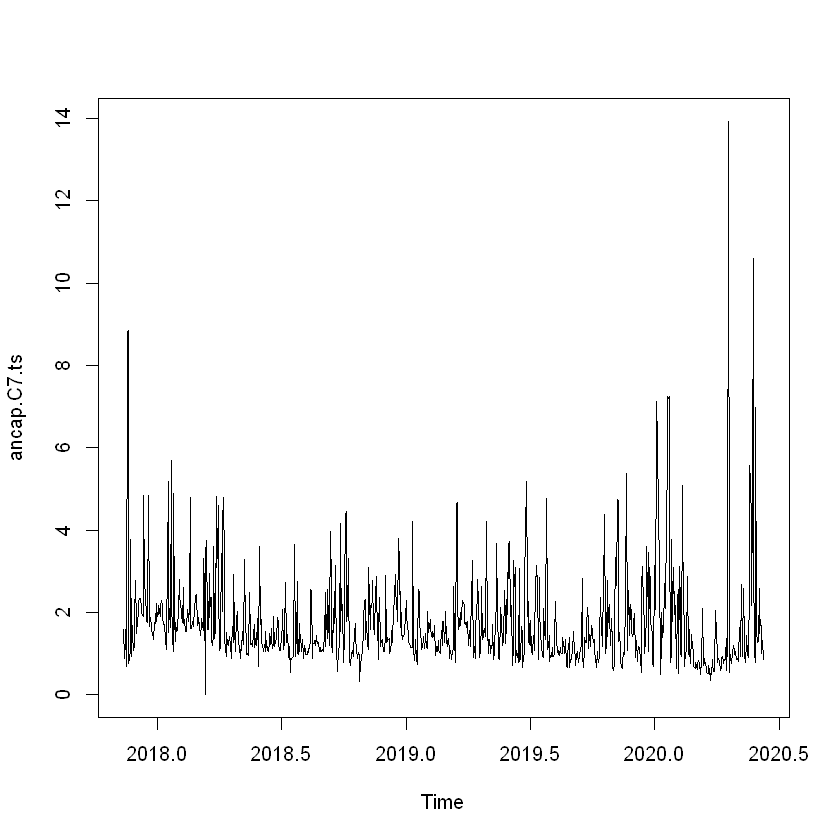

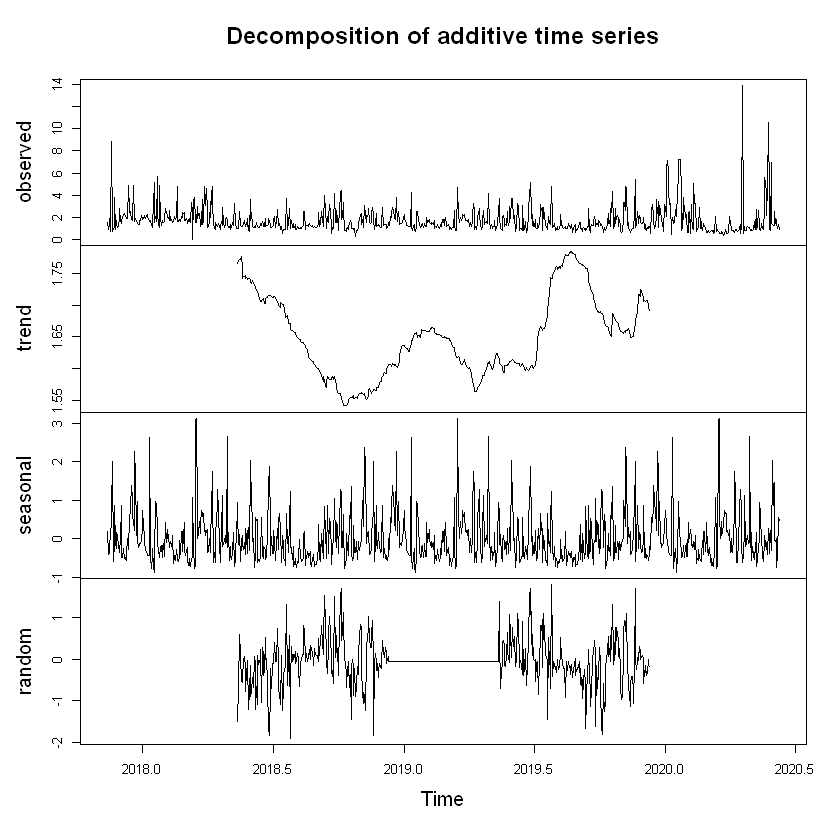

In [6]:
plot(ancap.C7.ts)
ancap.decomp <- plot(decompose(ancap.C7.ts))# si no agrego
# multiplicative es lo mismo

[1] 0.4074467

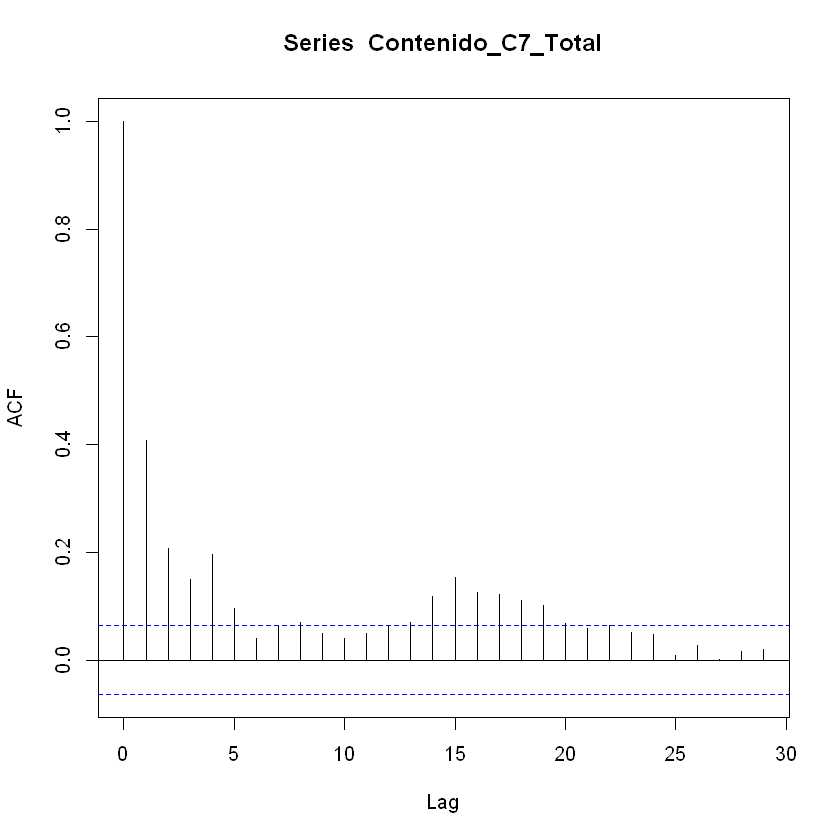

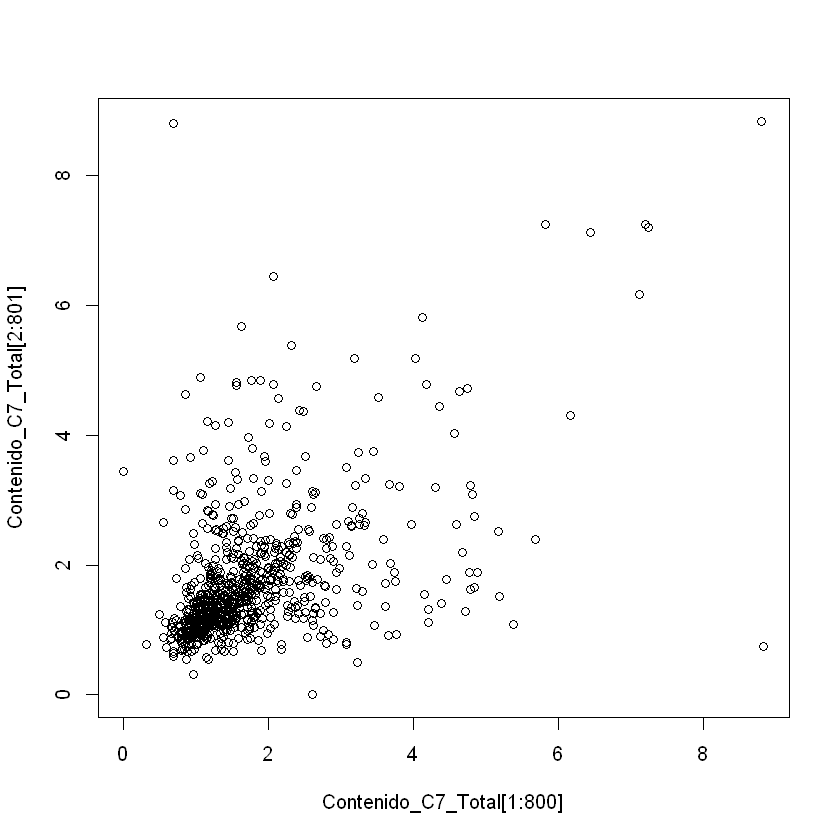

[1] 0.5563001

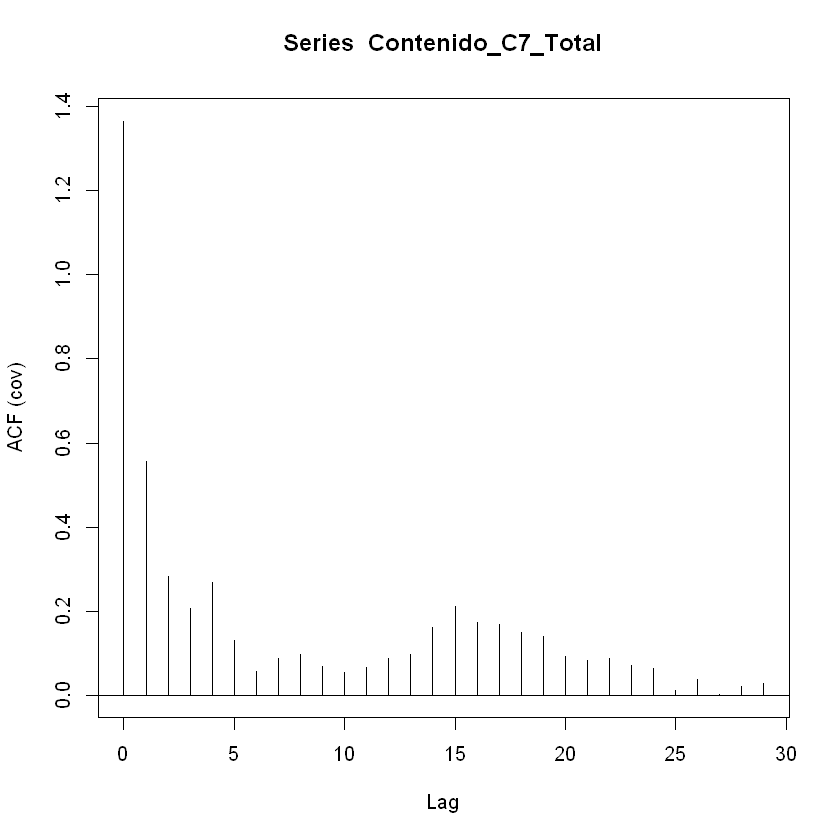

In [7]:
acf(Contenido_C7_Total)$acf[2]# autocorrelacion lag=1, dá el correlograma

plot(Contenido_C7_Total[1:800],Contenido_C7_Total[2:801]) 
acf(Contenido_C7_Total, type = c("covariance"))$acf[2]#covarianza

tdc_phd.ti_21049 variable que voy a usar para correlacionar dos series de tiempo.

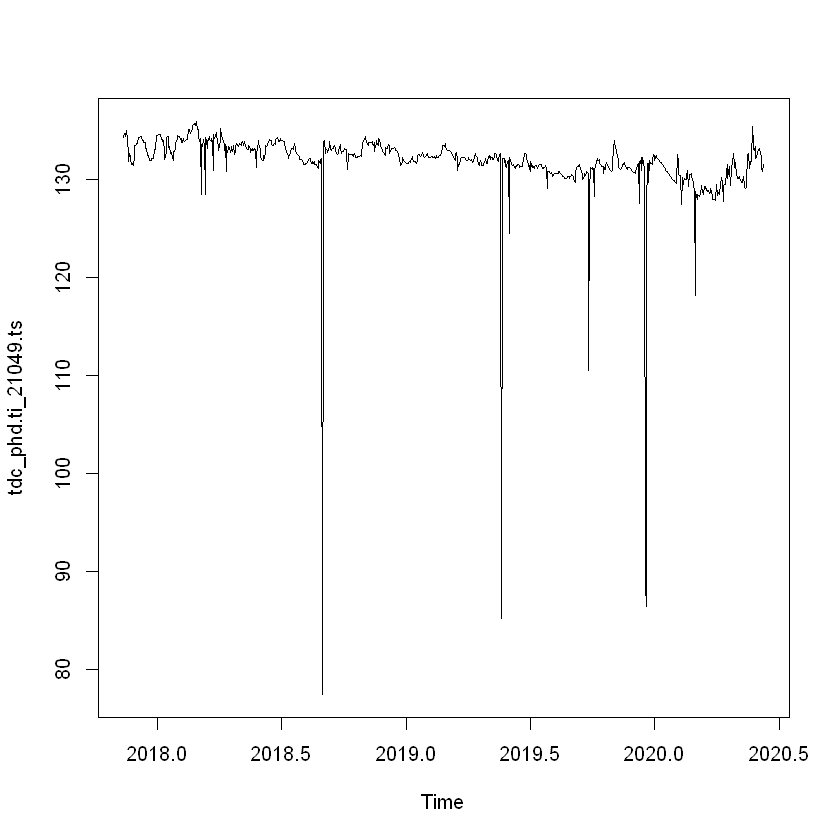

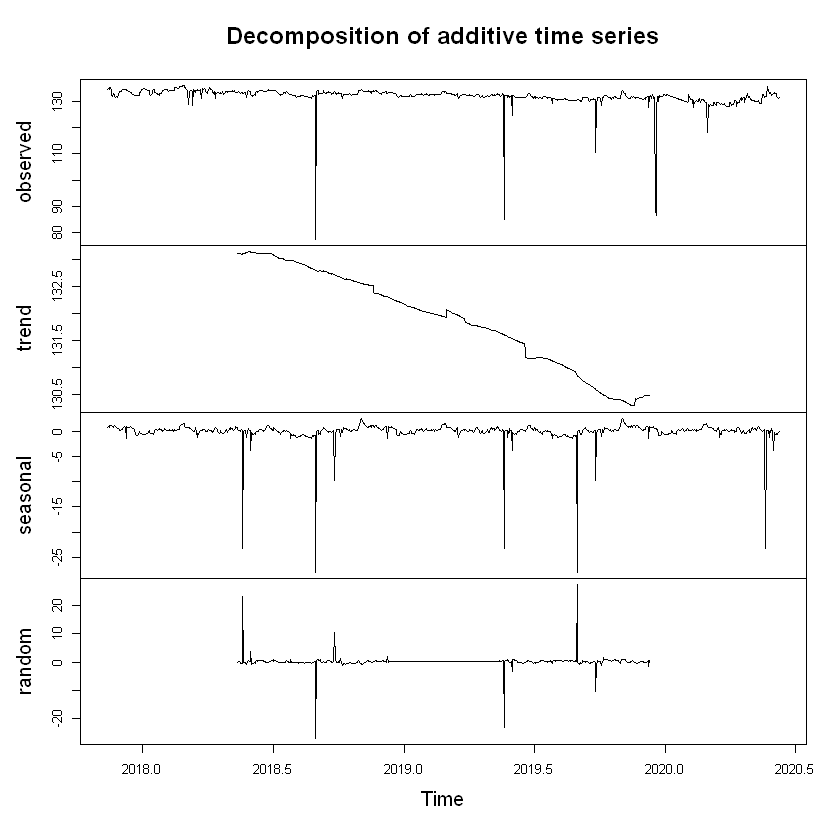

In [8]:
tdc_phd.ti_21049.ts <- ts(tdc_phd.ti_21049, start = c(2017, 317), freq = 365)
plot(tdc_phd.ti_21049.ts)
tdc_phd.ti_21049.decomp <- plot(decompose(tdc_phd.ti_21049.ts))

In [9]:
x <- tdc_phd.ti_21049; y <- Contenido_C7_Total
cov(x, y)
cor(x, y)

[1] 0.3944873

[1] 0.09454029

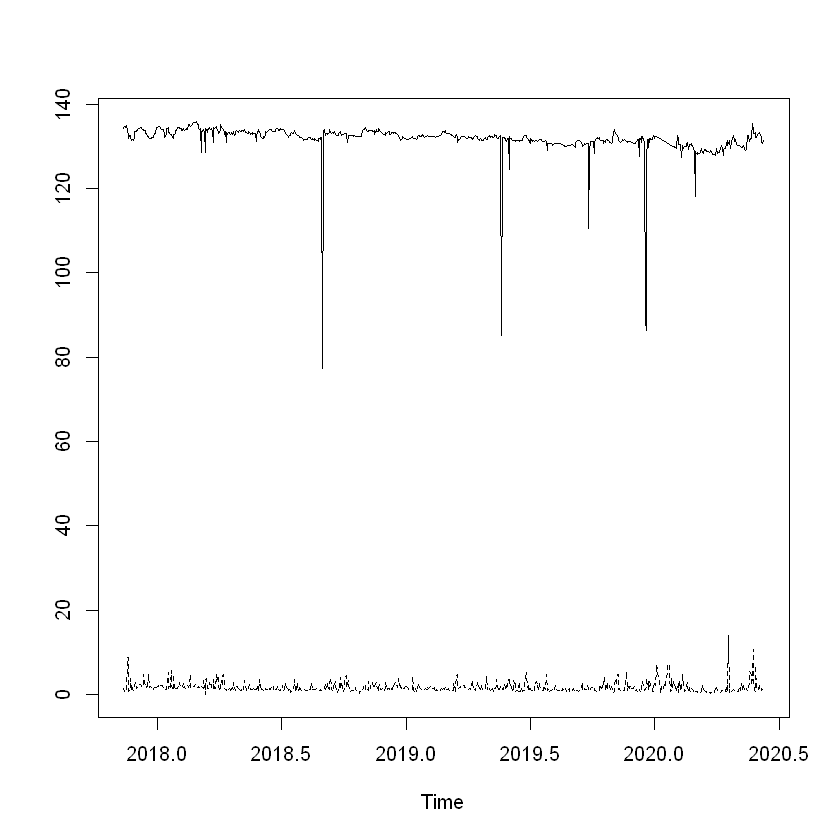

In [10]:
ts.plot(tdc_phd.ti_21049.ts, ancap.C7.ts, lty = c(1,2))

# la punteada es tdc_phd.ti_21049.ts, la continua es ancap.C7.ts

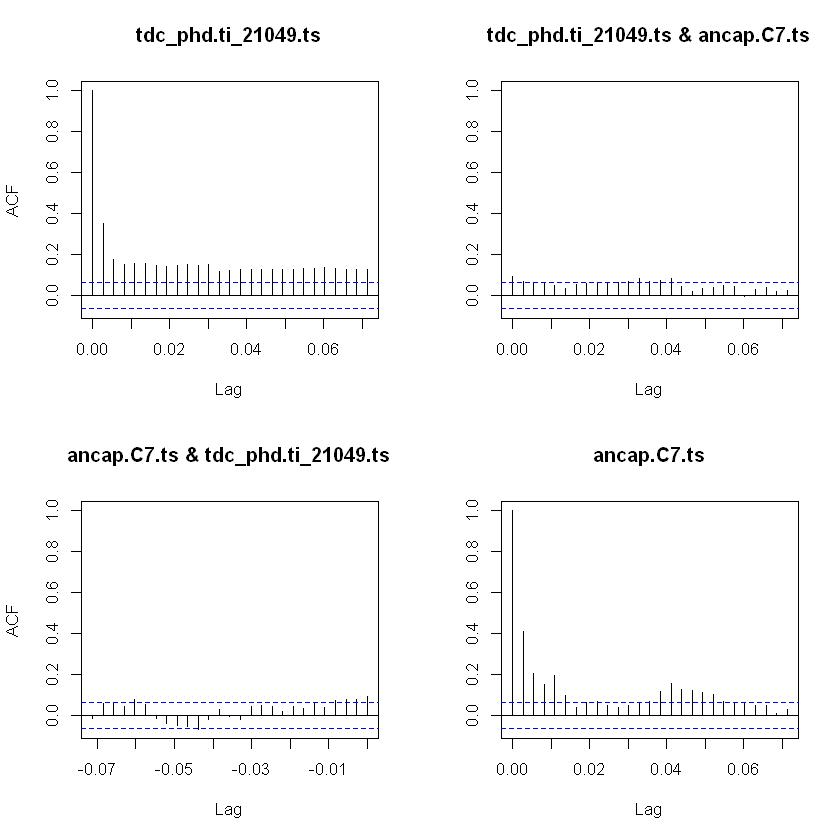

In [11]:
acf(ts.union(tdc_phd.ti_21049.ts, ancap.C7.ts))

Como parece que una de las variables tiene una tendencia, me quedo solo con el random para hacer lo anterior, osea el acf y ccf

In [12]:
ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.ti_21049.ran <- decompose(tdc_phd.ti_21049.ts)$random

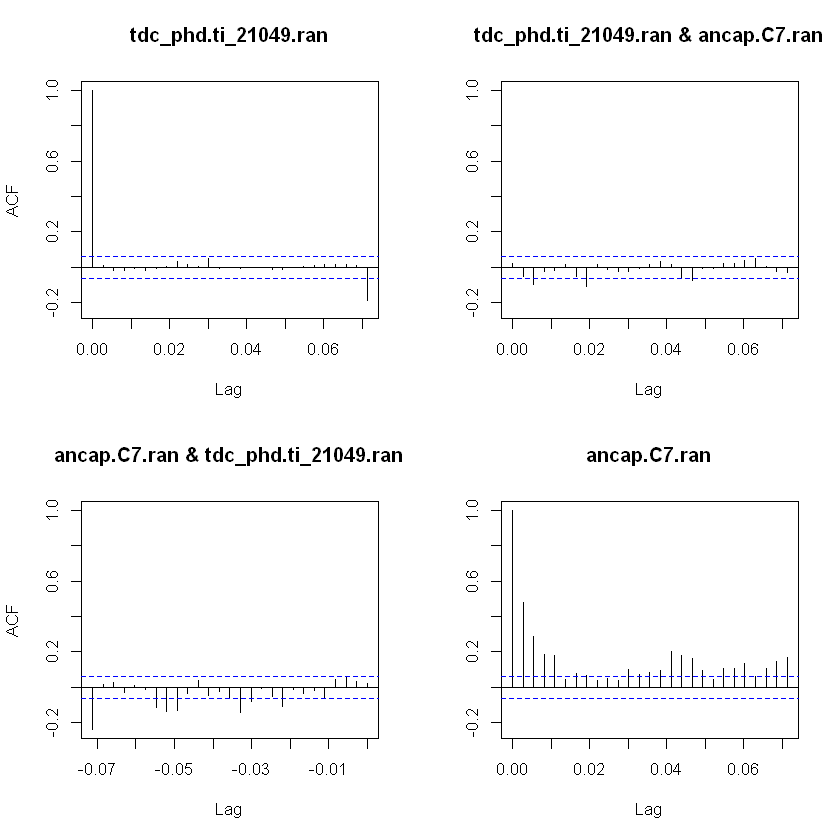

In [13]:
acf(ts.union(tdc_phd.ti_21049.ran, ancap.C7.ran), na.action = na.pass)

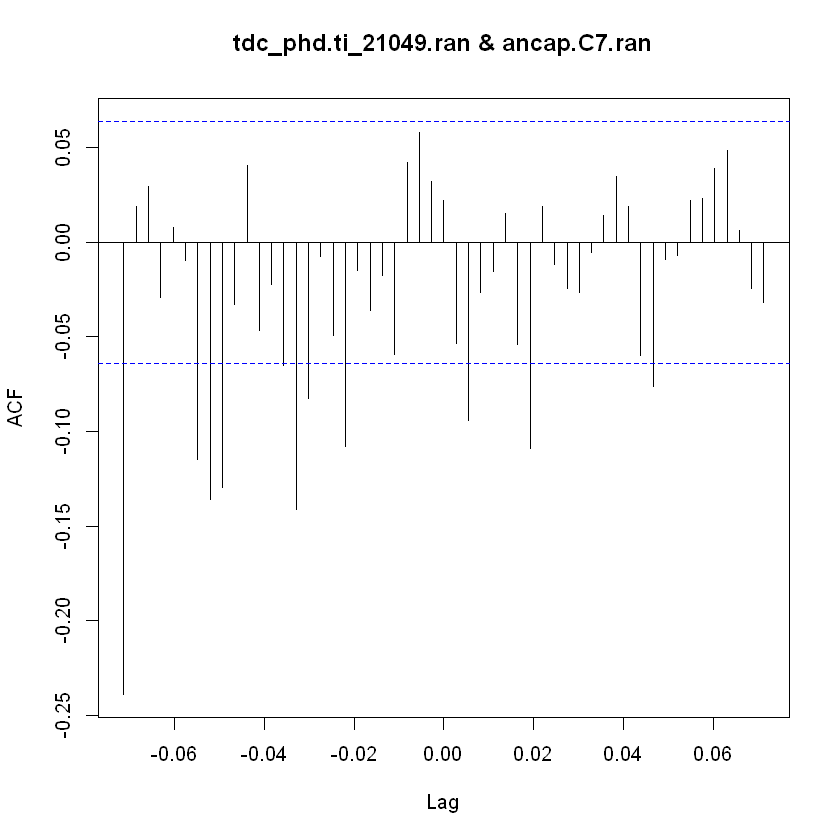

In [14]:
ccf (tdc_phd.ti_21049.ran, ancap.C7.ran, na.action = na.pass)

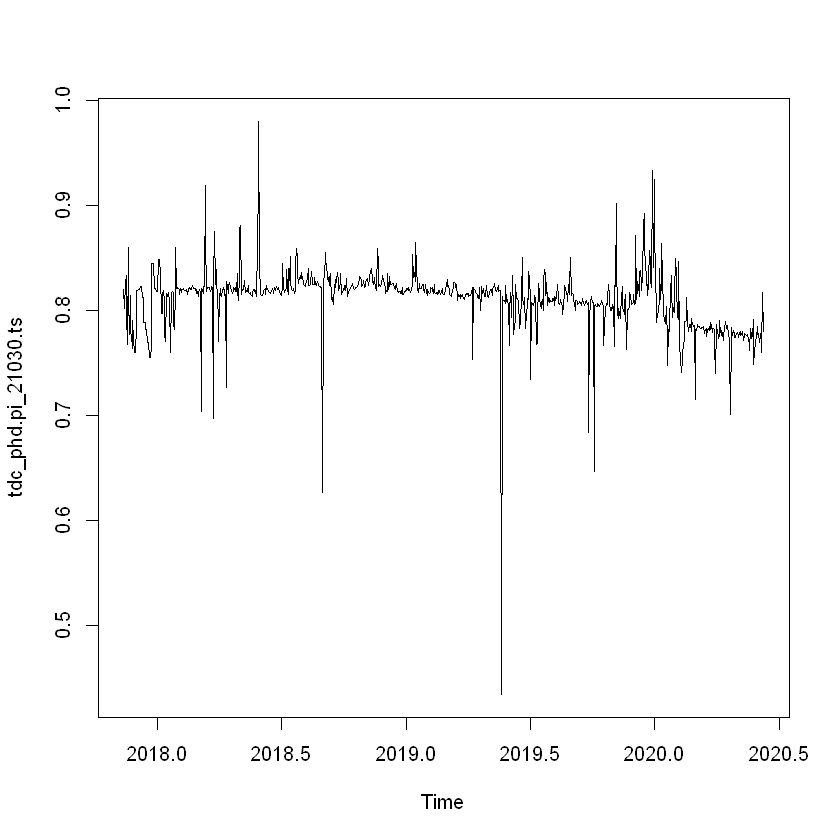

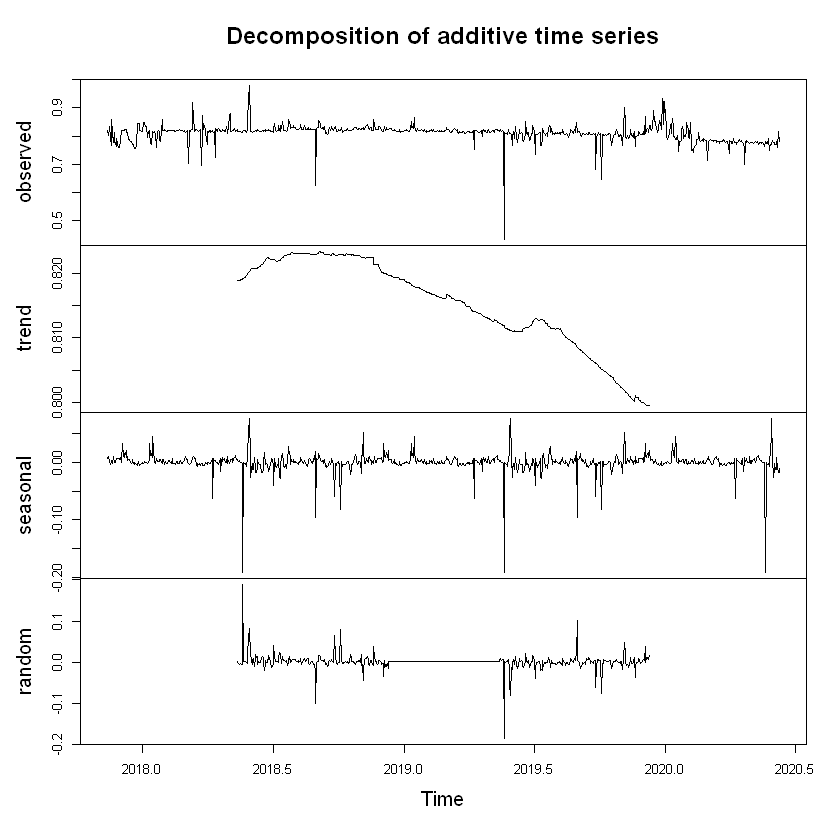

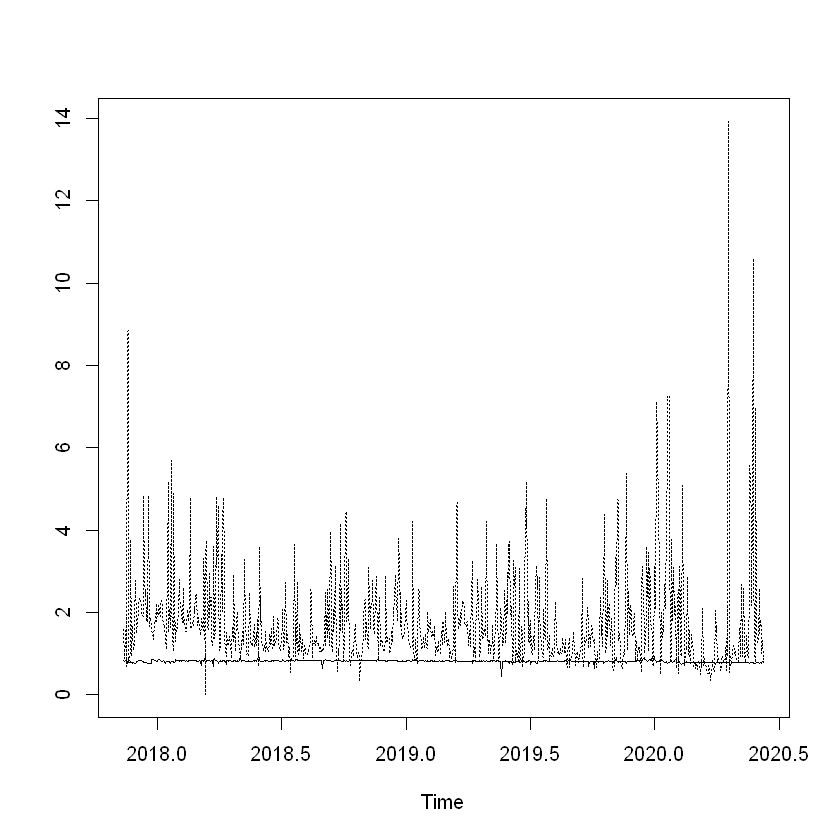

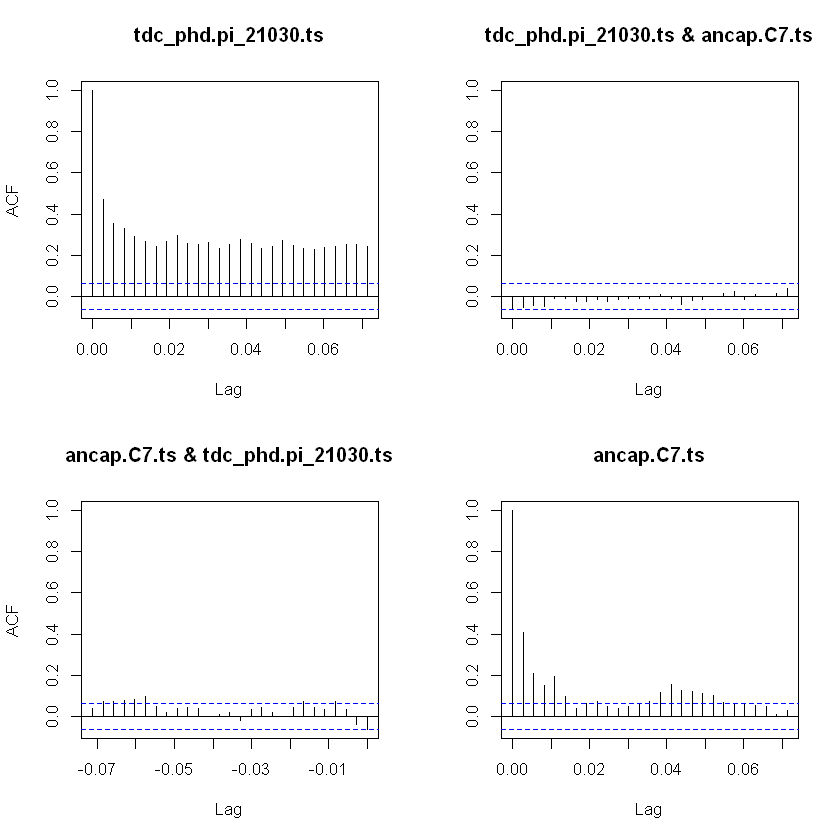

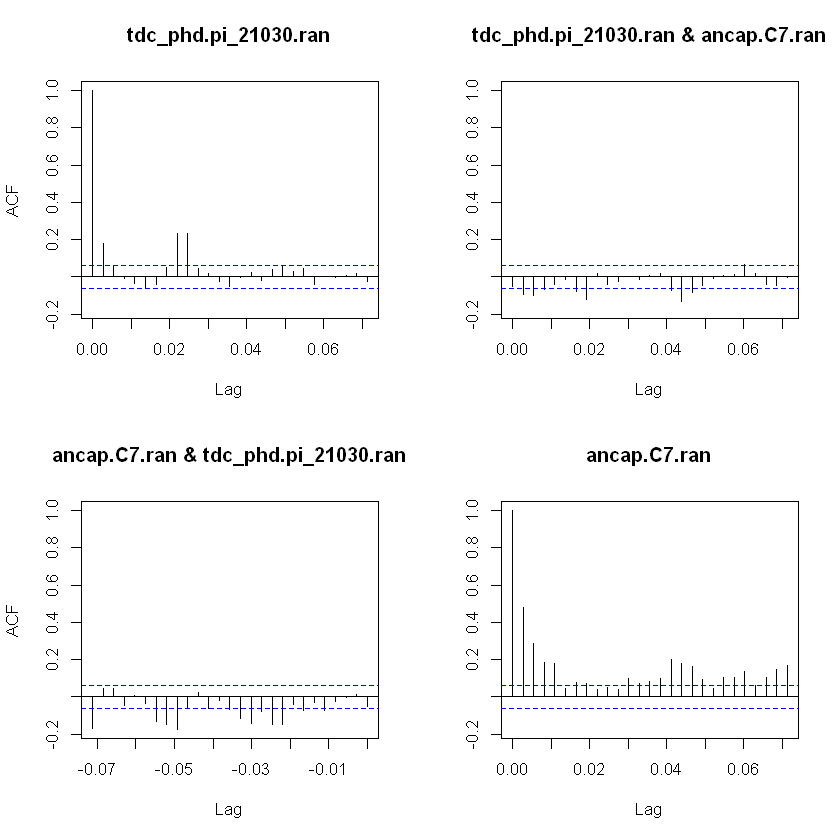

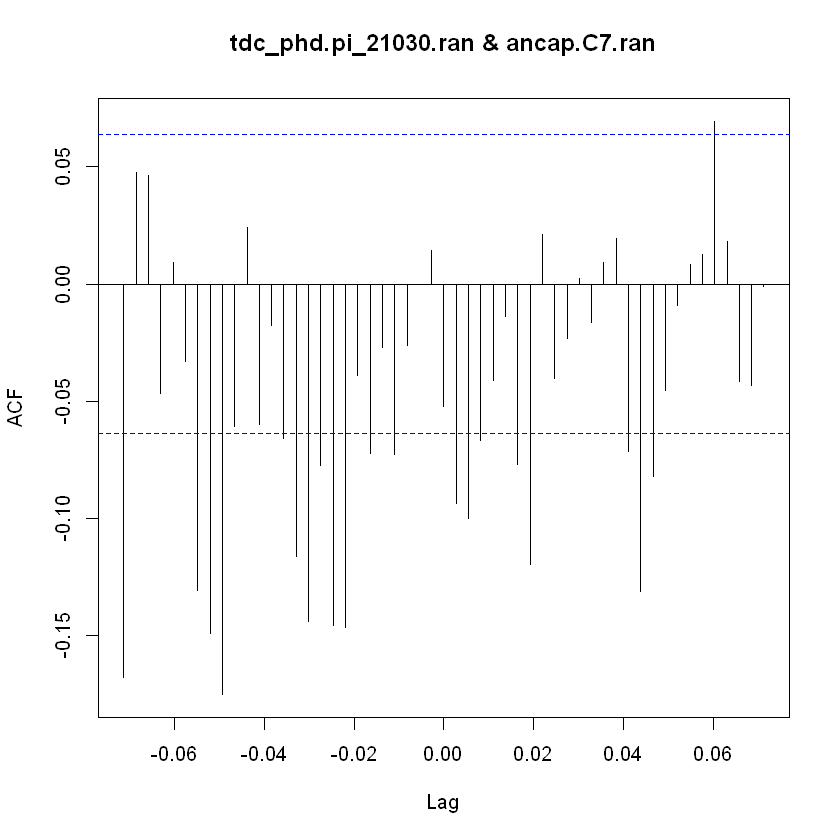

In [15]:
tdc_phd.pi_21030.ts <- ts(tdc_phd.pi_21030, start = c(2017, 317), freq = 365)
plot(tdc_phd.pi_21030.ts)
tdc_phd.pi_21030.decomp <- plot(decompose(tdc_phd.pi_21030.ts))

ts.plot(tdc_phd.pi_21030.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.pi_21030.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.pi_21030.ran <- decompose(tdc_phd.pi_21030.ts)$random

acf(ts.union(tdc_phd.pi_21030.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.pi_21030.ran, ancap.C7.ran, na.action = na.pass)

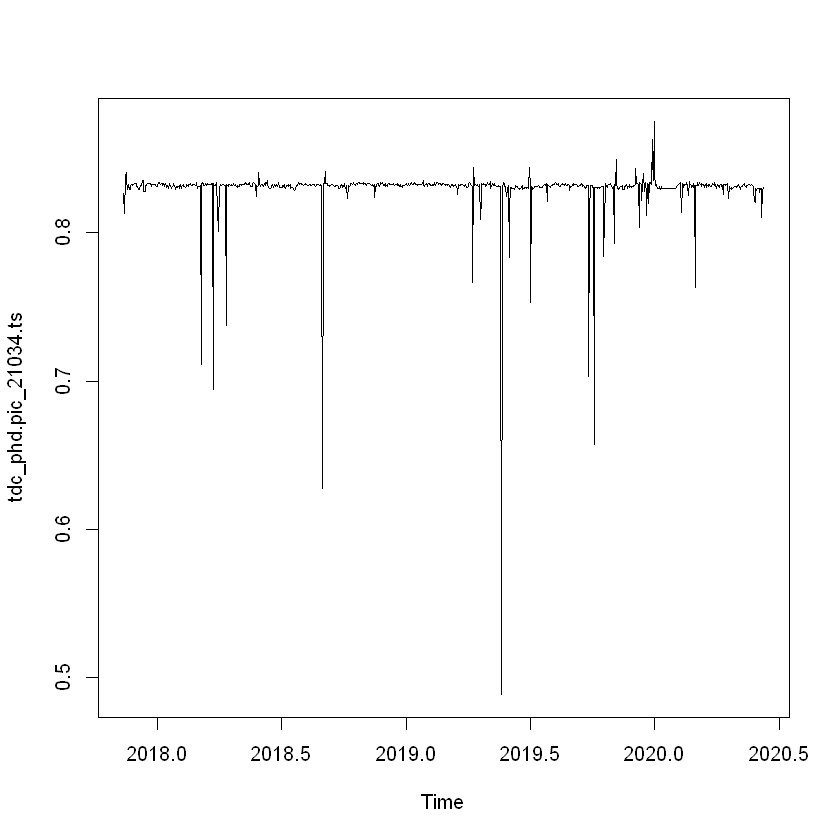

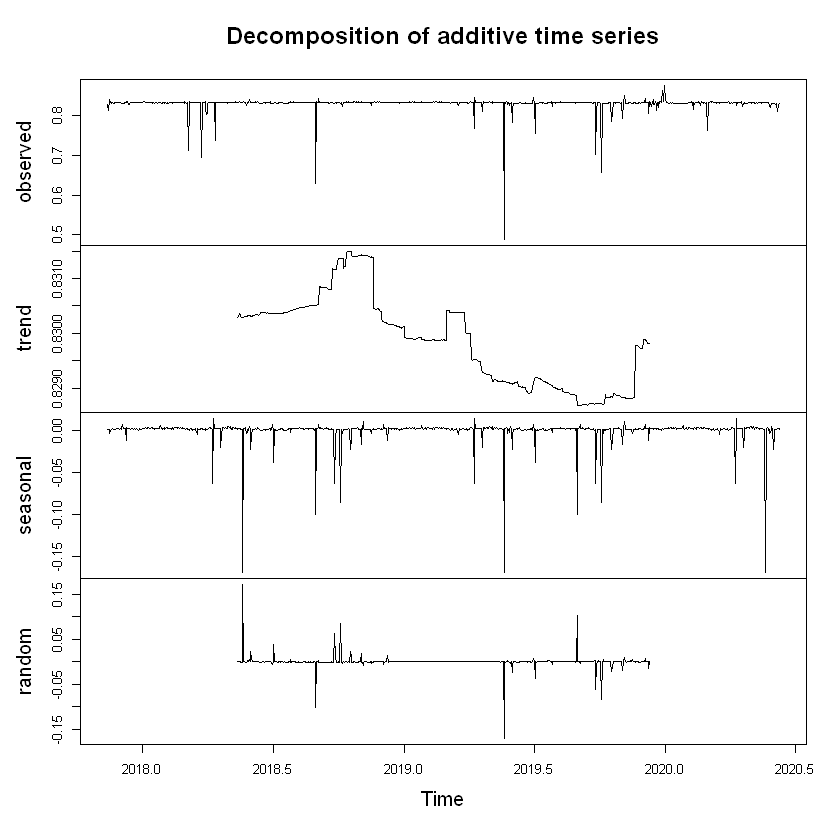

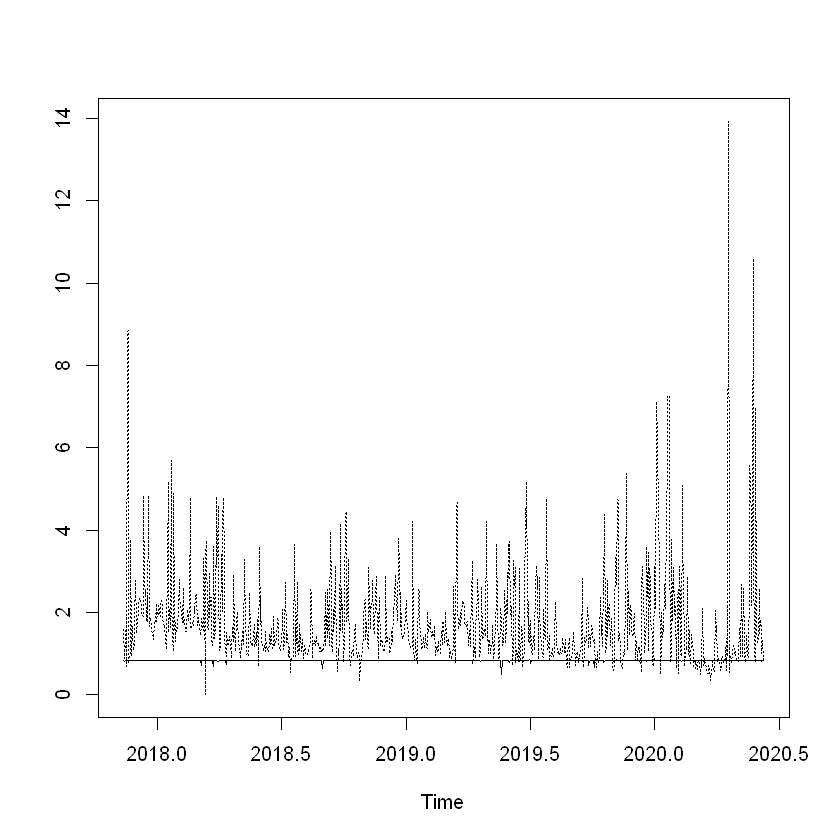

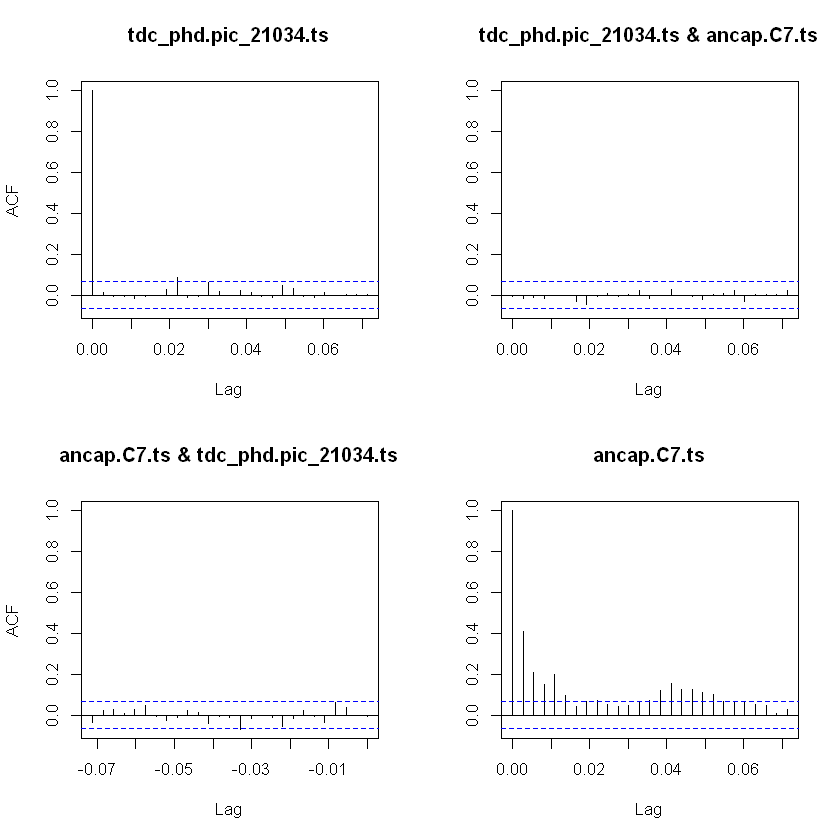

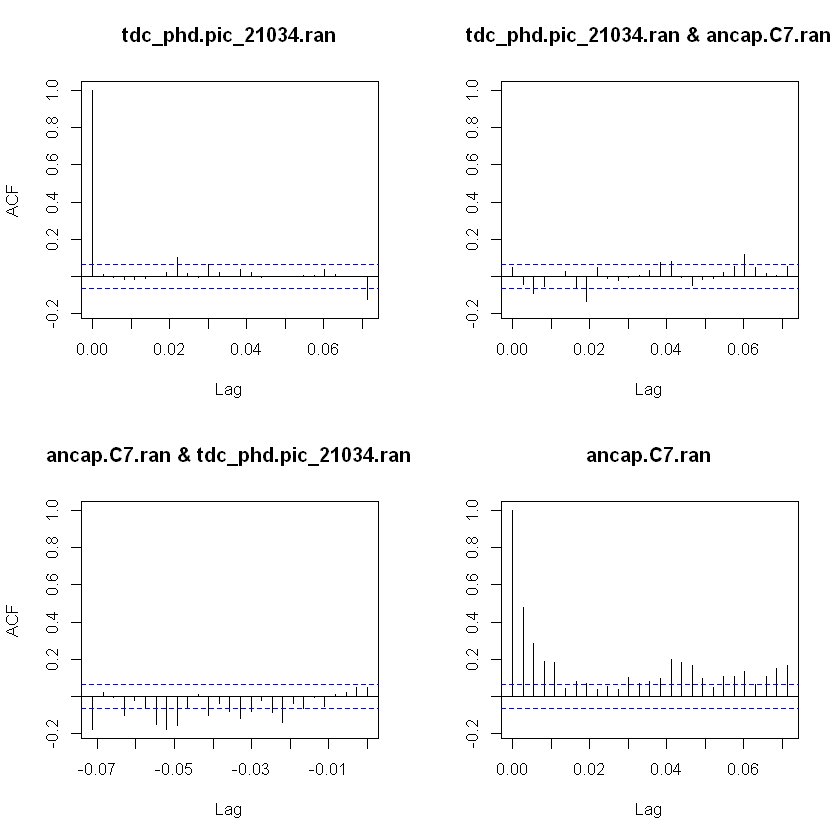

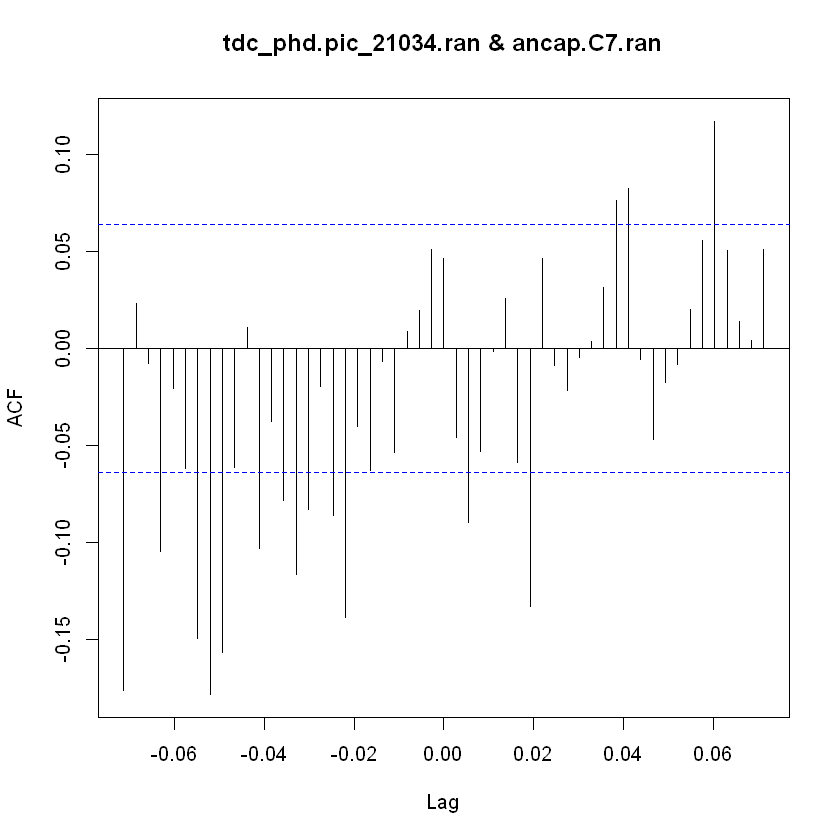

In [16]:
tdc_phd.pic_21034.ts <- ts(tdc_phd.pic_21034, start = c(2017, 317), freq = 365)
plot(tdc_phd.pic_21034.ts)
tdc_phd.pic_21034.decomp <- plot(decompose(tdc_phd.pic_21034.ts))

ts.plot(tdc_phd.pic_21034.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.pic_21034.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.pic_21034.ran <- decompose(tdc_phd.pic_21034.ts)$random

acf(ts.union(tdc_phd.pic_21034.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.pic_21034.ran, ancap.C7.ran, na.action = na.pass)

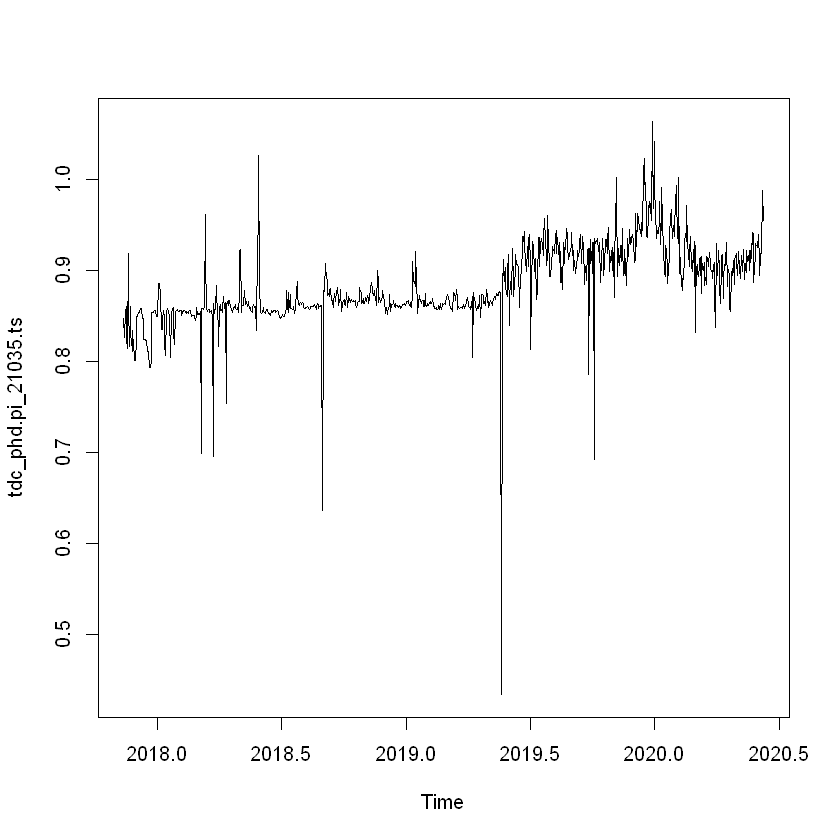

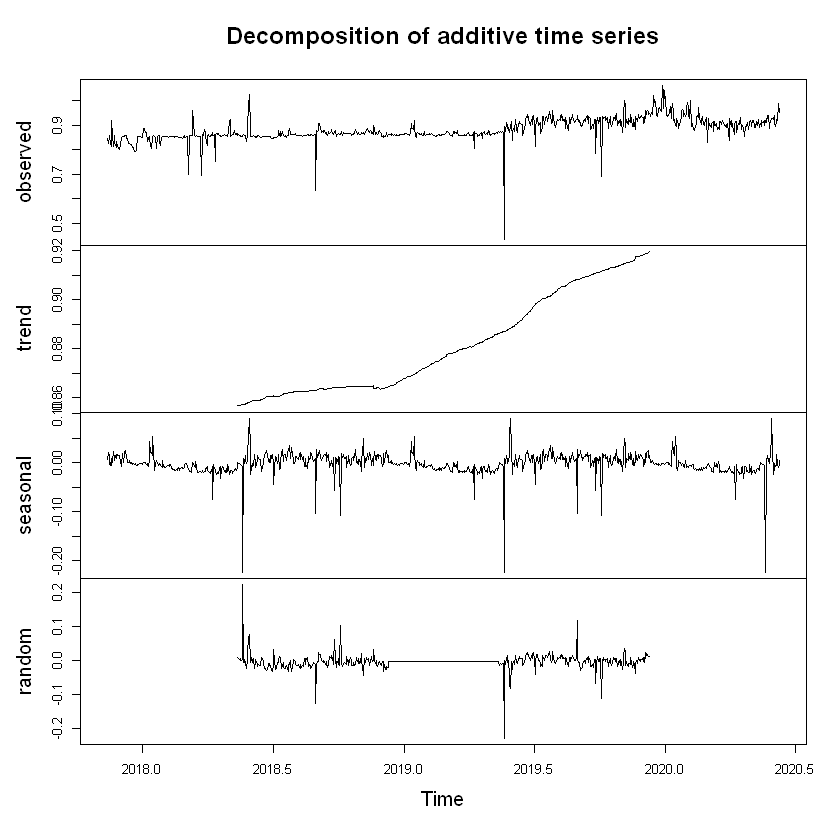

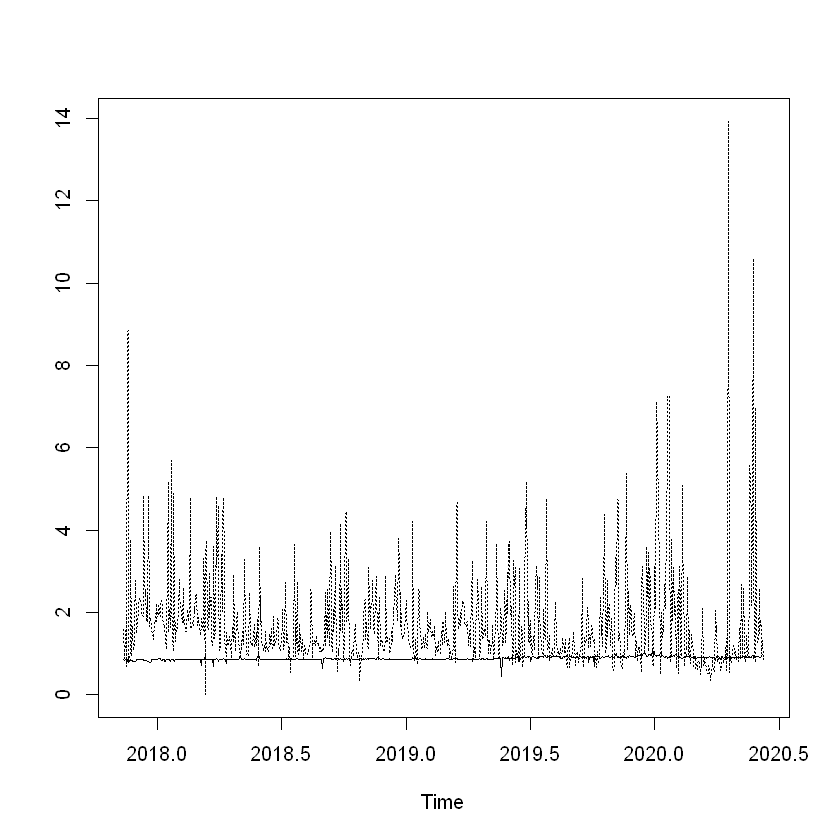

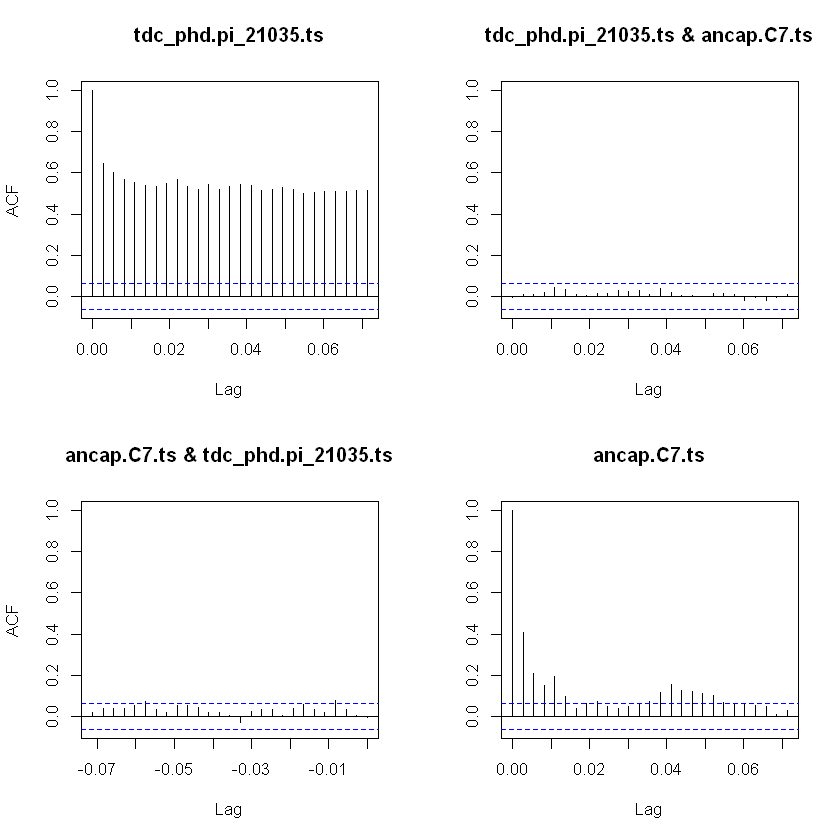

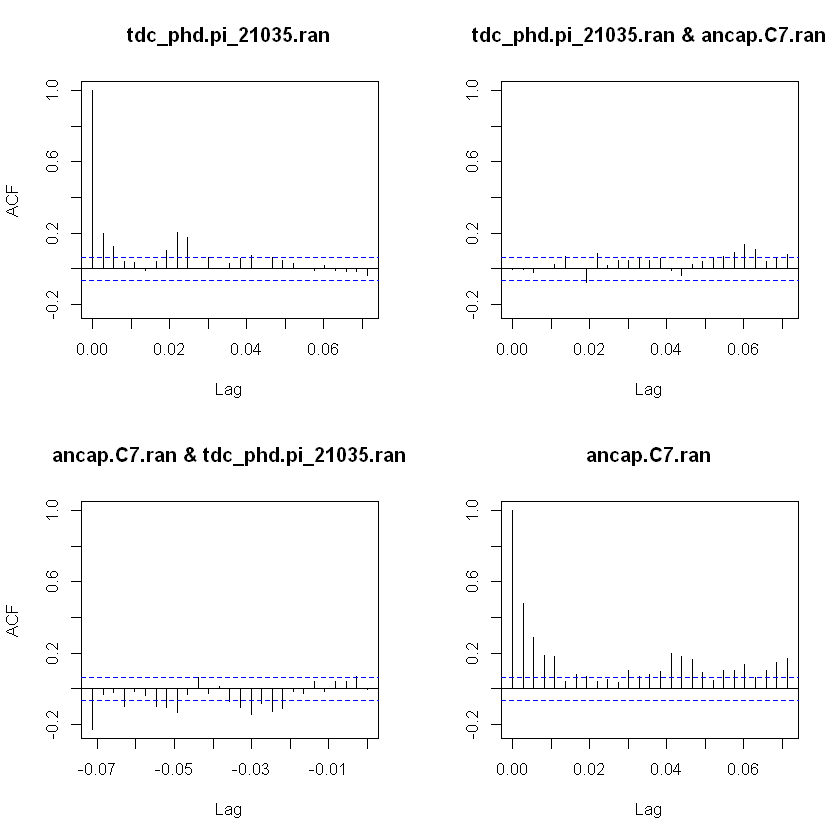

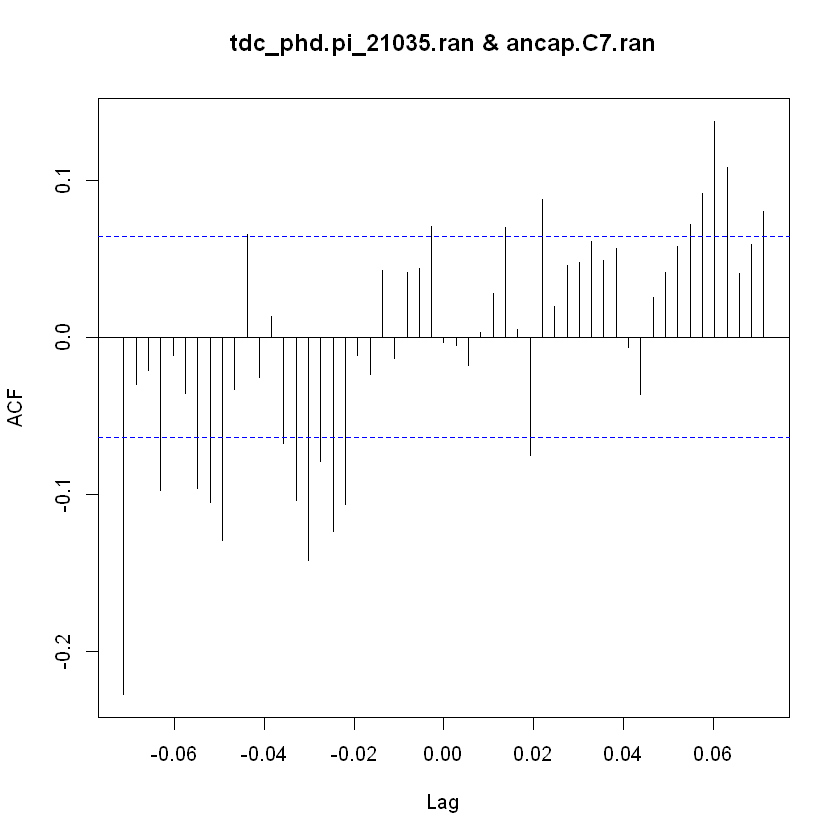

In [17]:
tdc_phd.pi_21035.ts <- ts(tdc_phd.pi_21035, start = c(2017, 317), freq = 365)
plot(tdc_phd.pi_21035.ts)
tdc_phd.pi_21035.decomp <- plot(decompose(tdc_phd.pi_21035.ts))

ts.plot(tdc_phd.pi_21035.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.pi_21035.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.pi_21035.ran <- decompose(tdc_phd.pi_21035.ts)$random

acf(ts.union(tdc_phd.pi_21035.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.pi_21035.ran, ancap.C7.ran, na.action = na.pass)

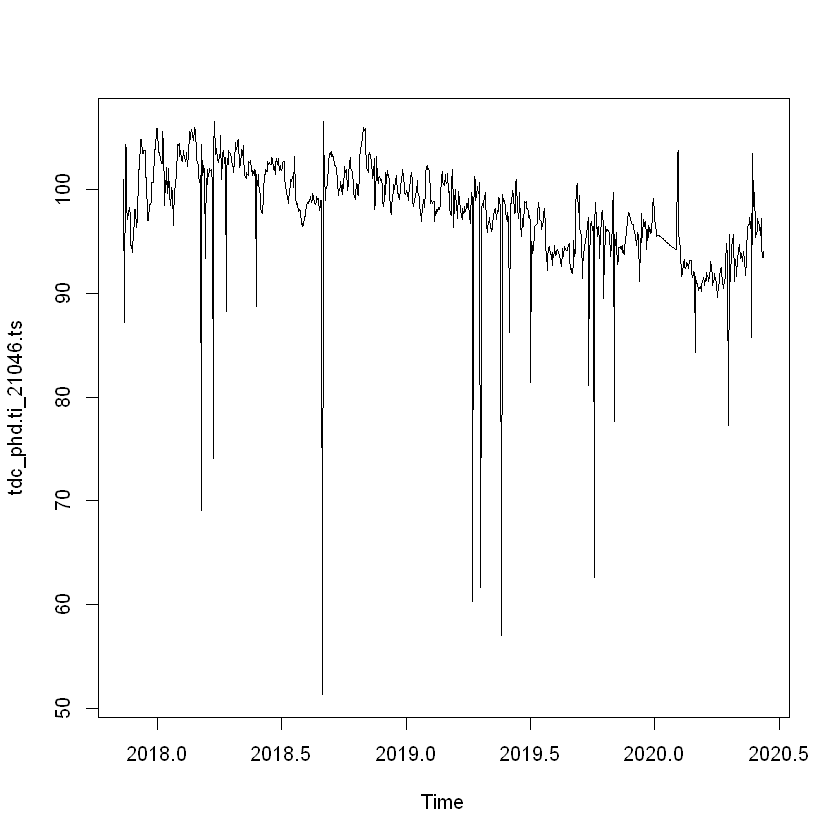

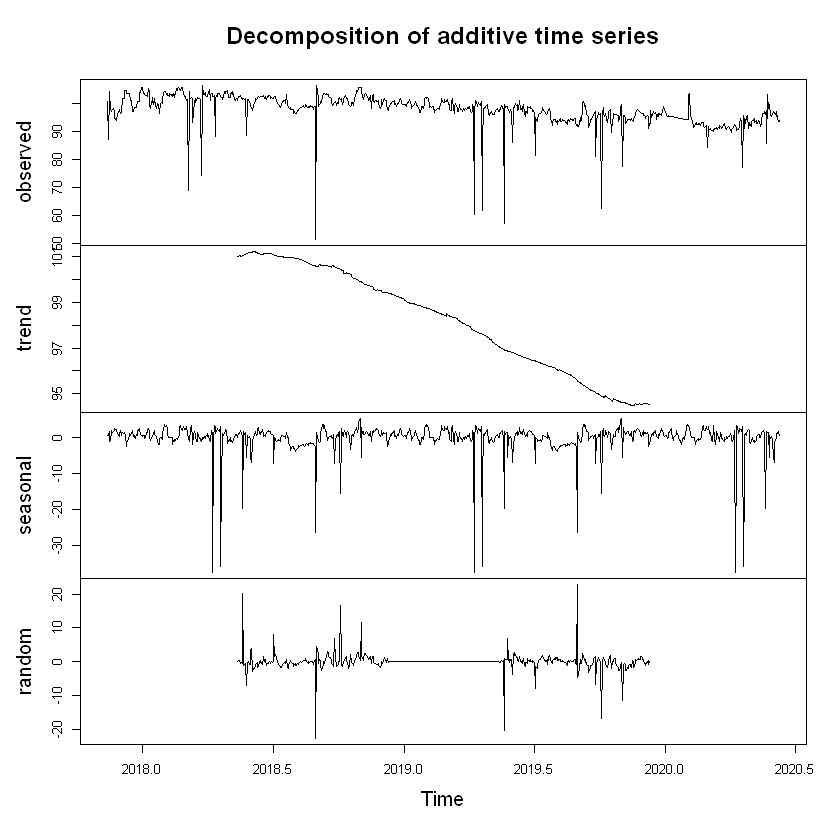

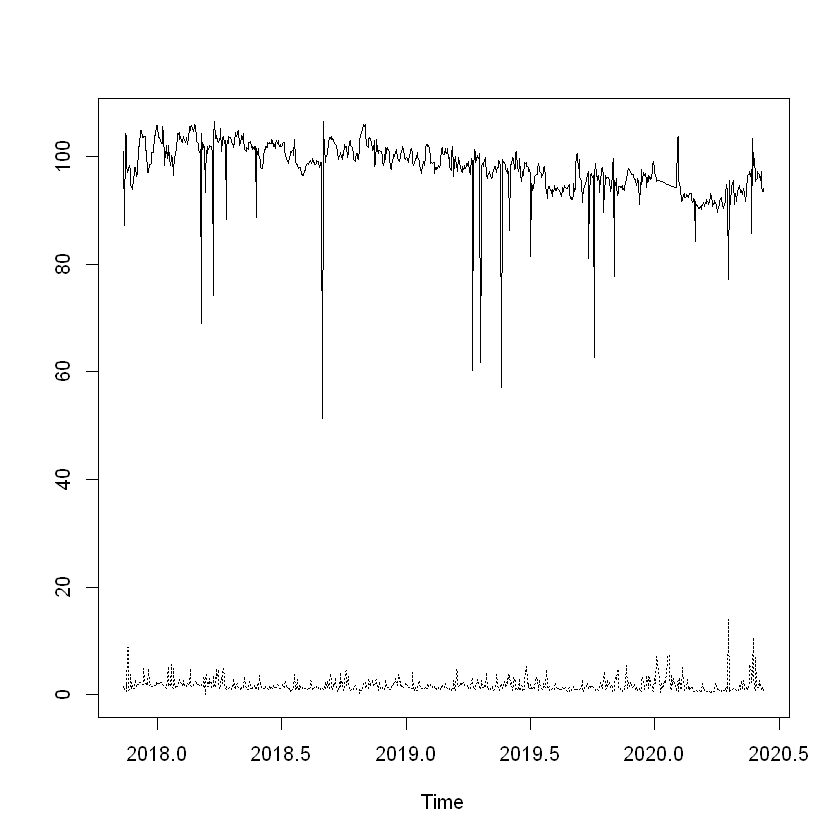

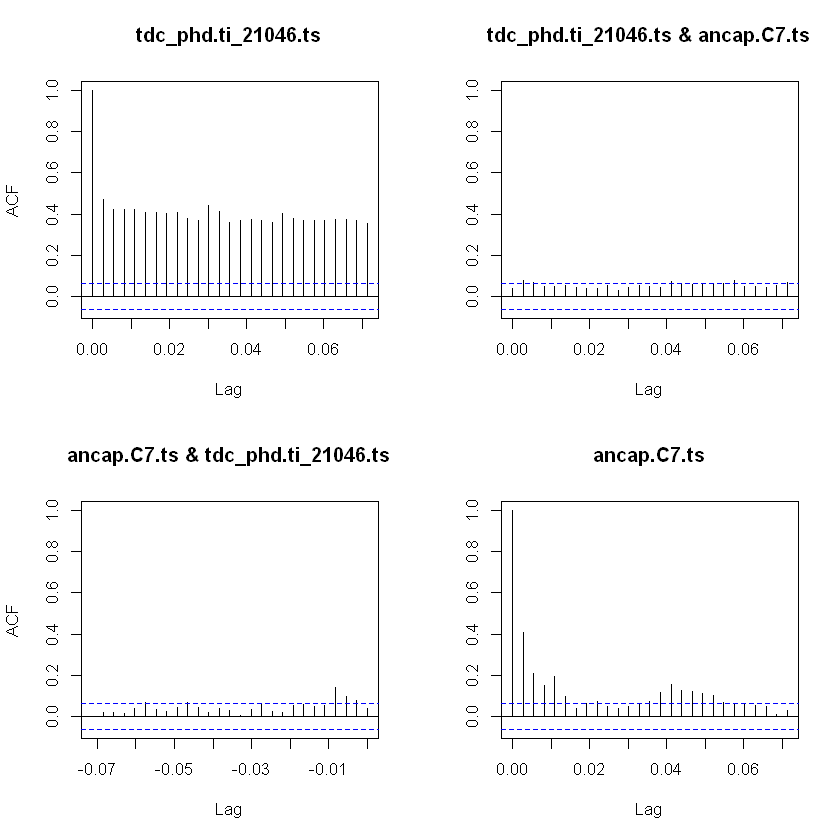

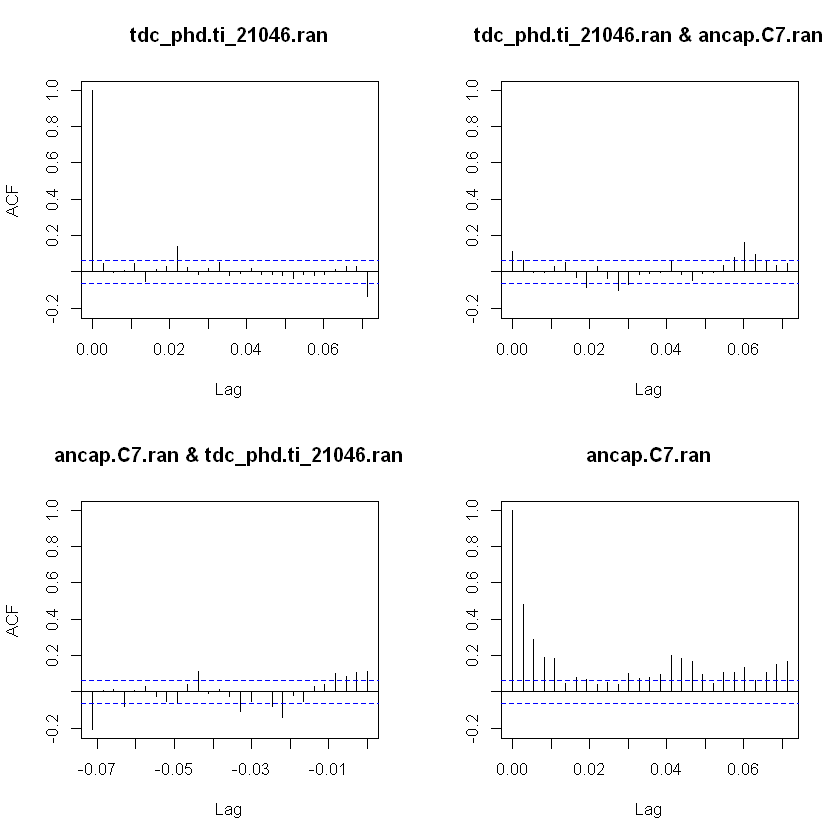

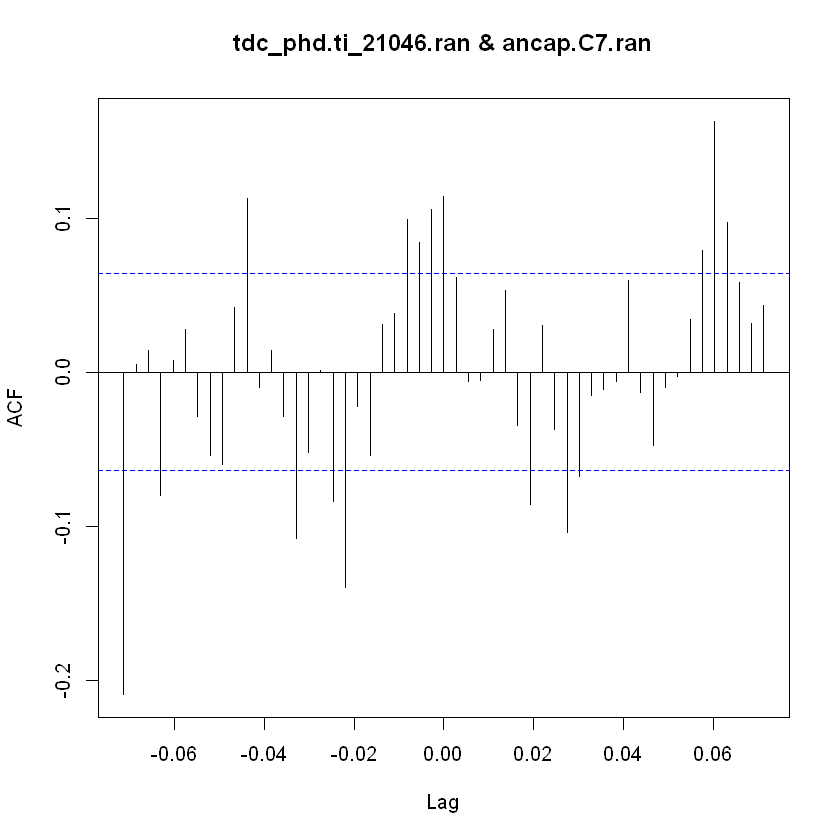

In [19]:
tdc_phd.ti_21046.ts <- ts(tdc_phd.ti_21046, start = c(2017, 317), freq = 365)
plot(tdc_phd.ti_21046.ts)
tdc_phd.ti_21046.decomp <- plot(decompose(tdc_phd.ti_21046.ts))

ts.plot(tdc_phd.ti_21046.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.ti_21046.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.ti_21046.ran <- decompose(tdc_phd.ti_21046.ts)$random

acf(ts.union(tdc_phd.ti_21046.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.ti_21046.ran, ancap.C7.ran, na.action = na.pass)

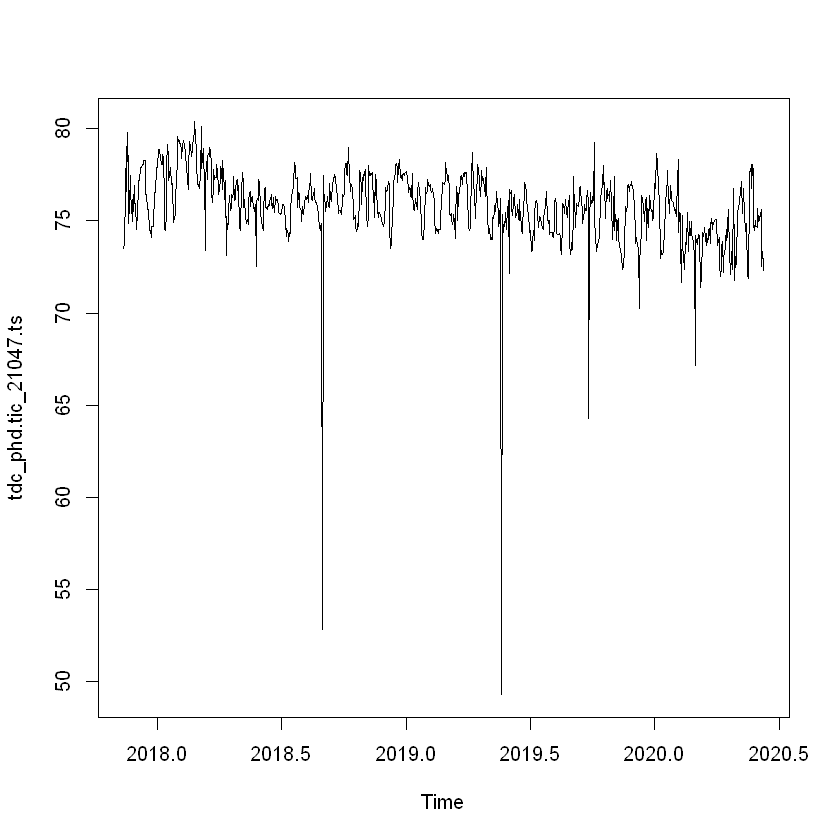

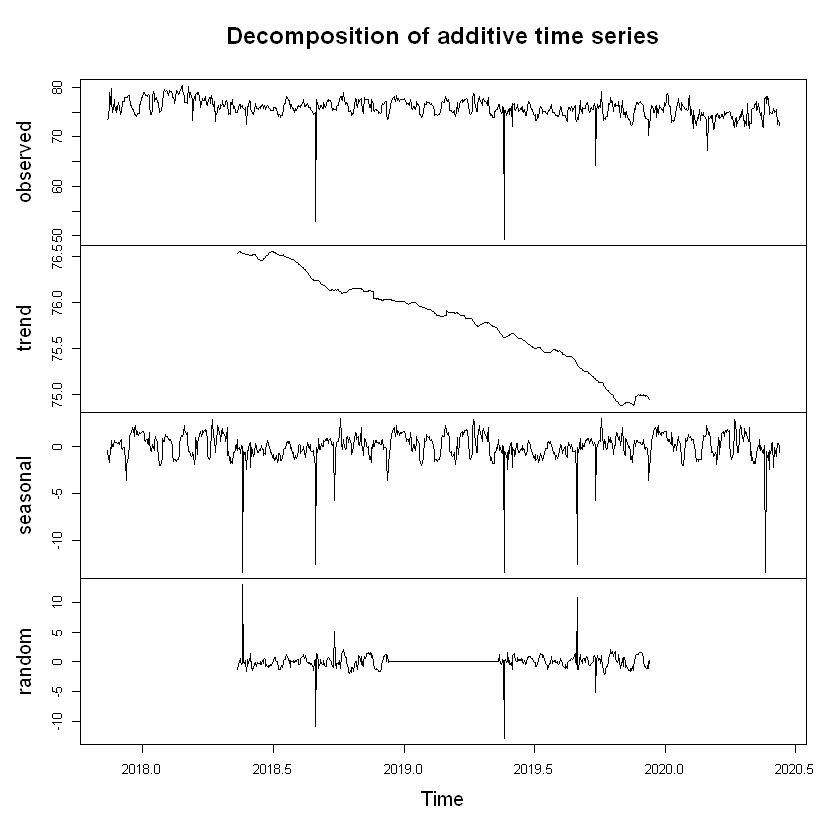

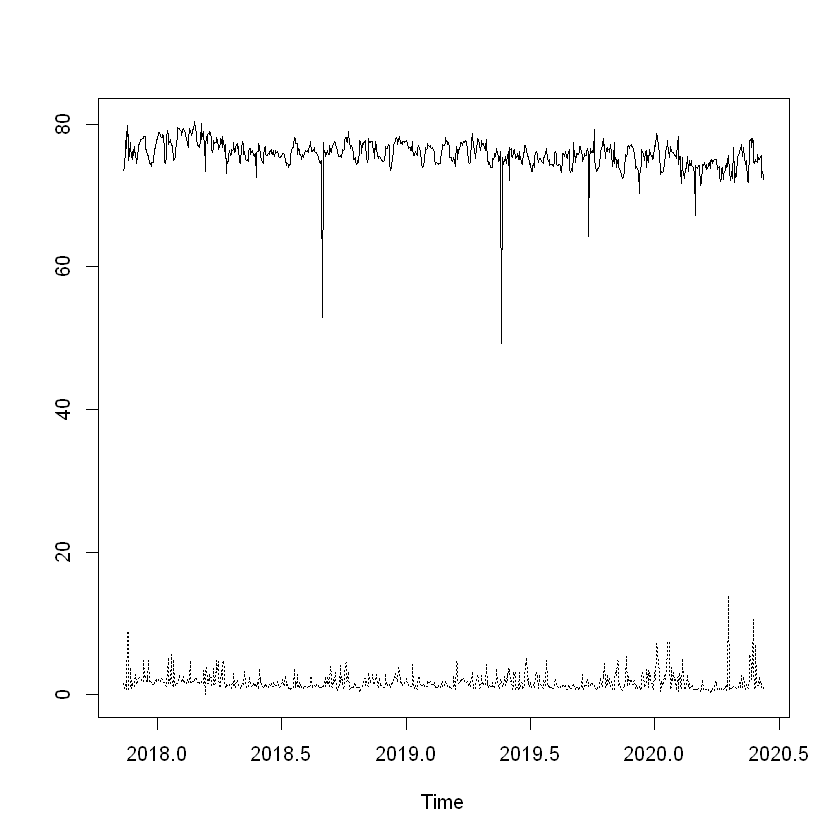

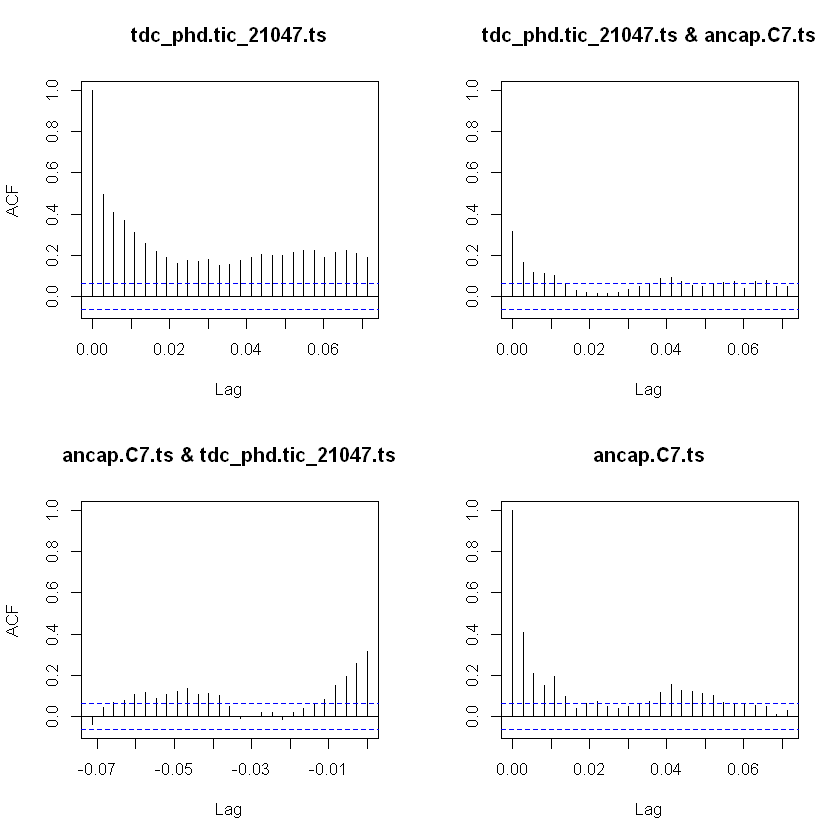

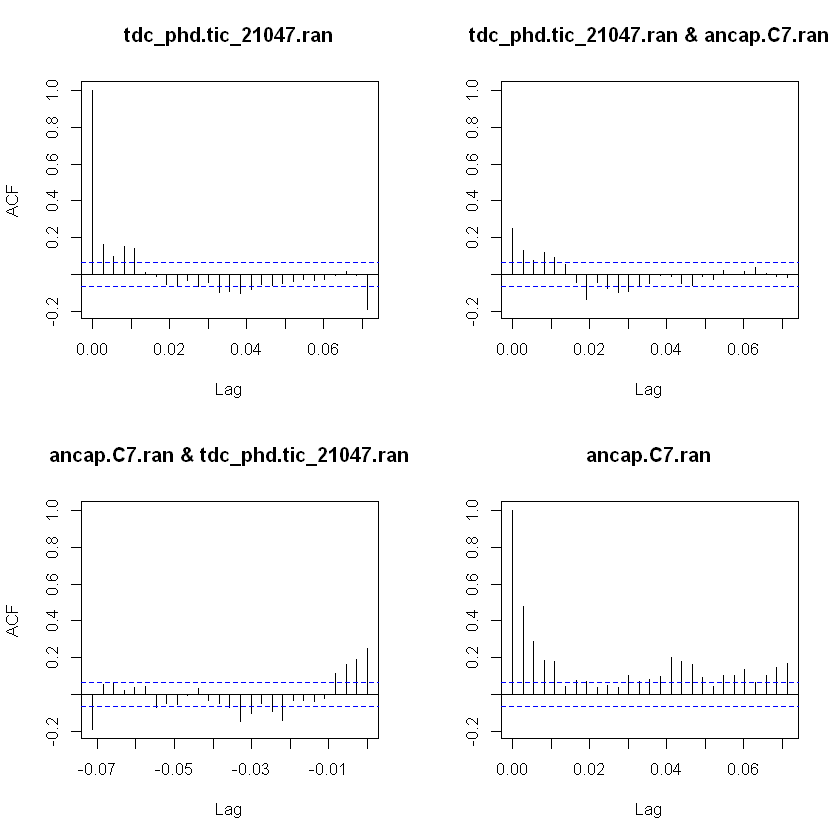

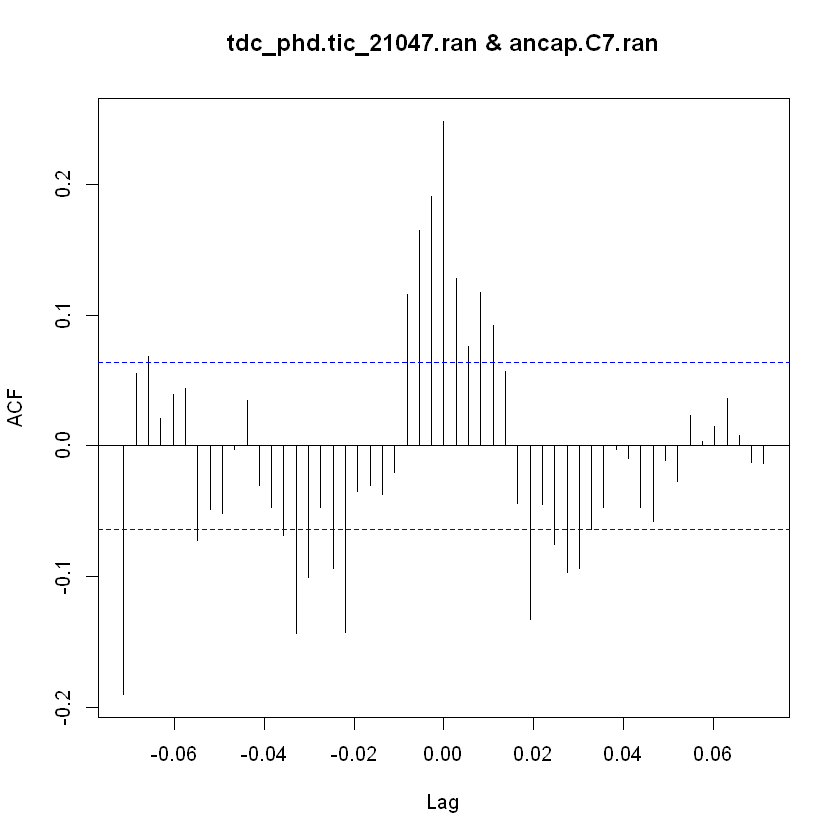

In [20]:
tdc_phd.tic_21047.ts <- ts(tdc_phd.tic_21047, start = c(2017, 317), freq = 365)
plot(tdc_phd.tic_21047.ts)
tdc_phd.tic_21047.decomp <- plot(decompose(tdc_phd.tic_21047.ts))

ts.plot(tdc_phd.tic_21047.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.tic_21047.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.tic_21047.ran <- decompose(tdc_phd.tic_21047.ts)$random

acf(ts.union(tdc_phd.tic_21047.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.tic_21047.ran, ancap.C7.ran, na.action = na.pass)

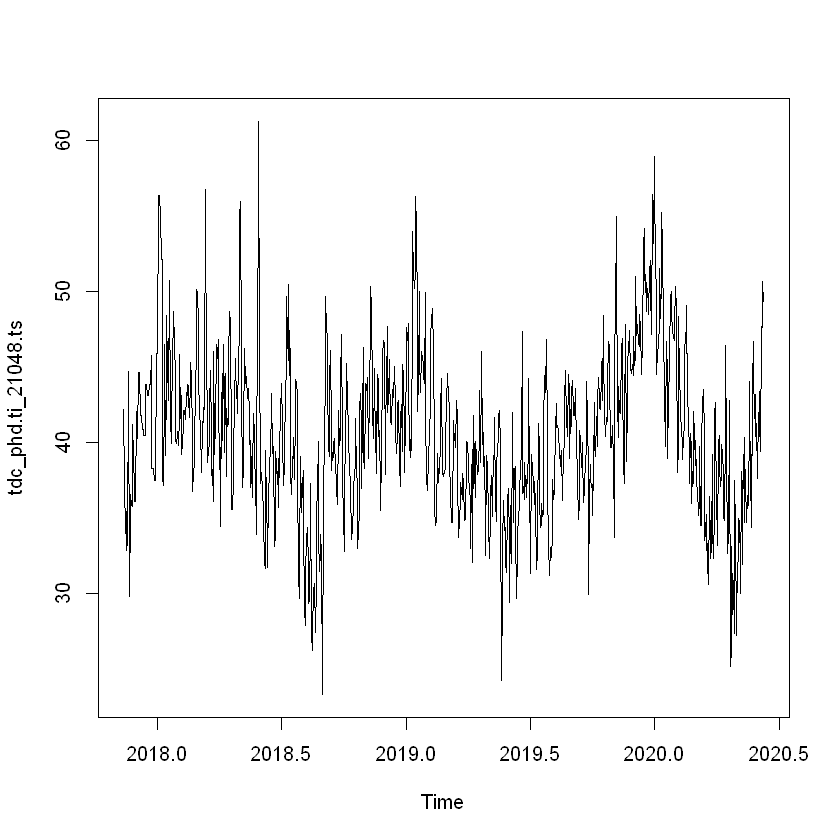

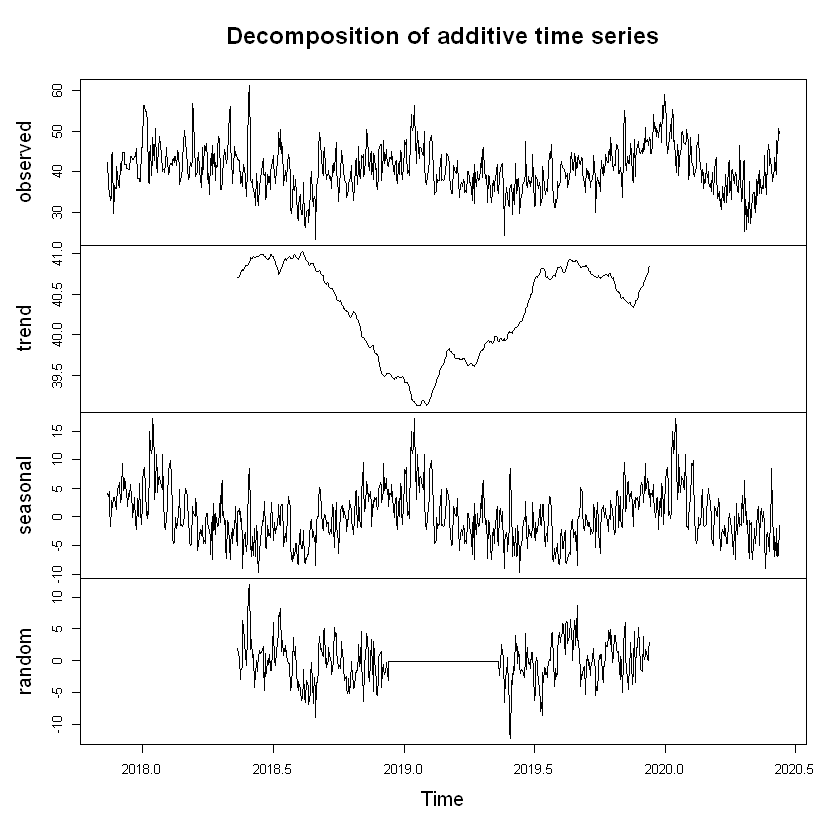

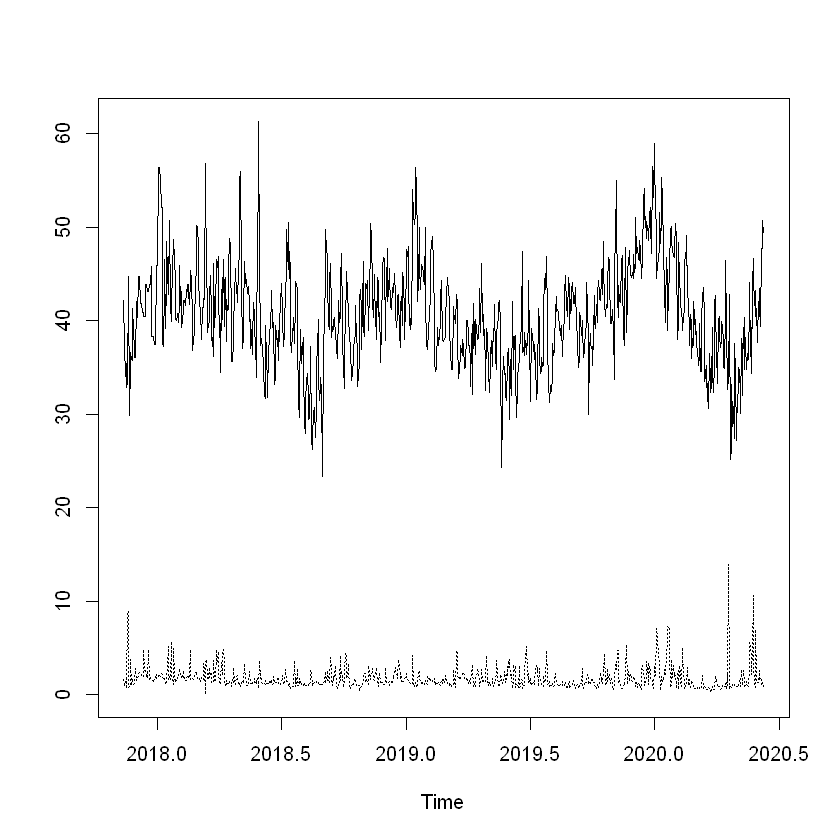

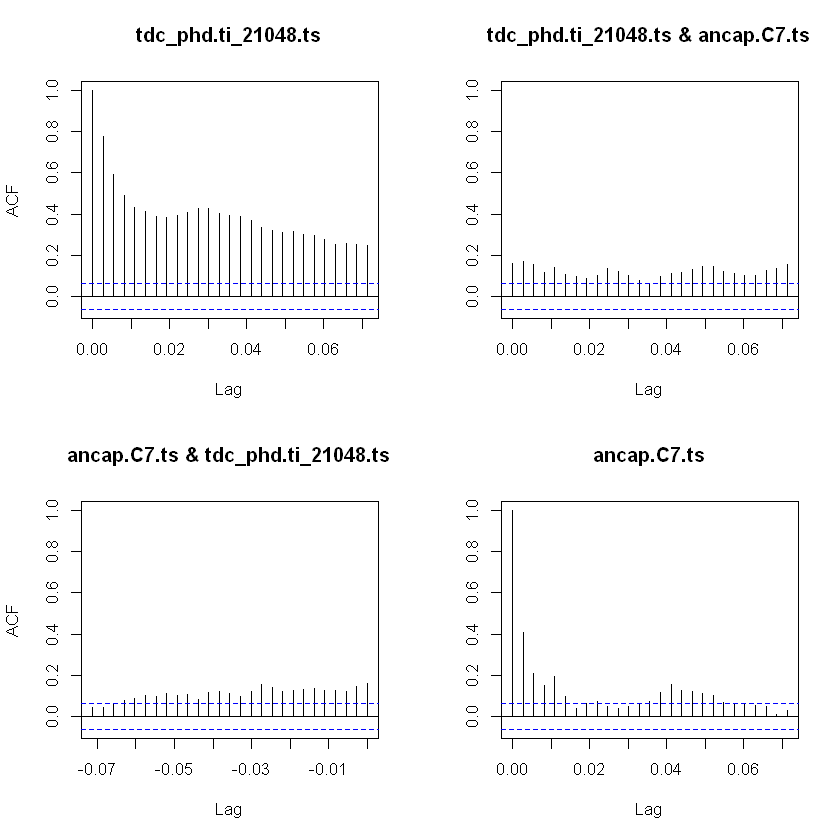

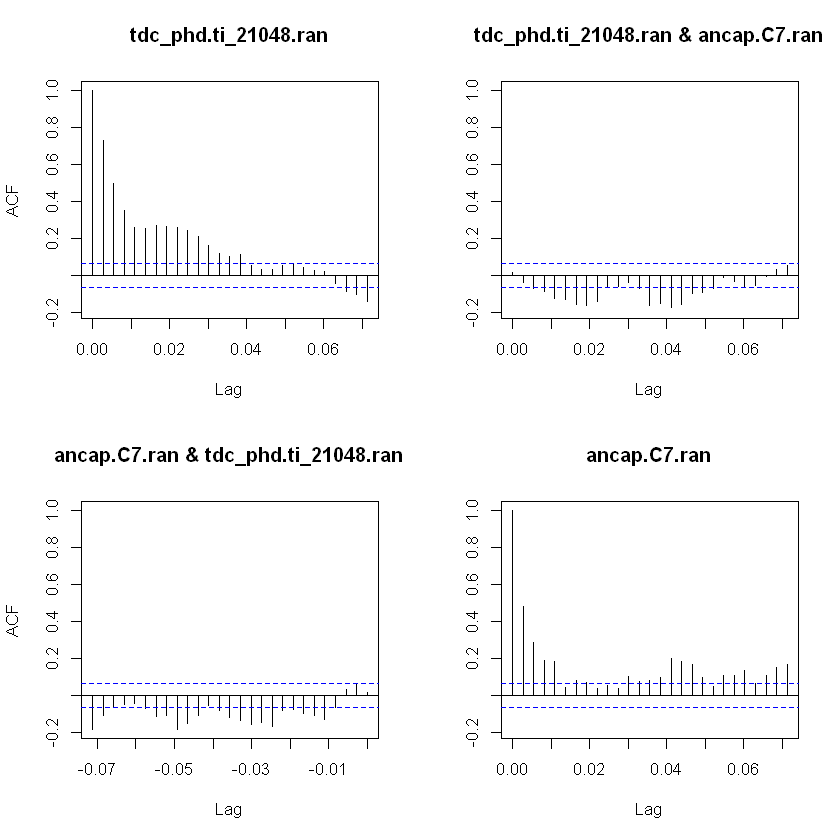

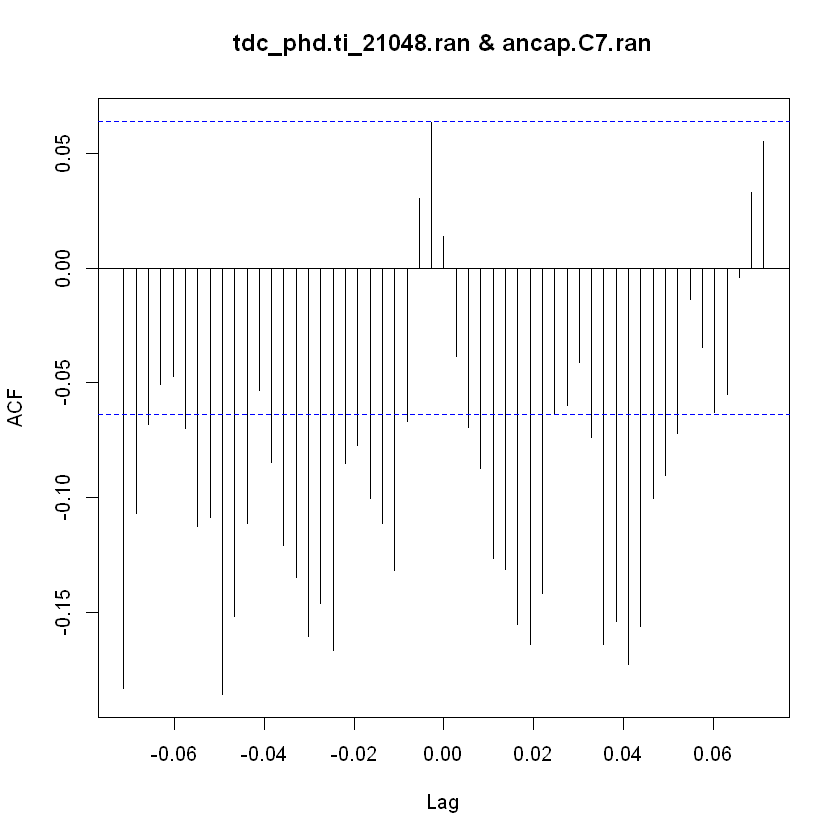

In [21]:
tdc_phd.ti_21048.ts <- ts(tdc_phd.ti_21048, start = c(2017, 317), freq = 365)
plot(tdc_phd.ti_21048.ts)
tdc_phd.ti_21048.decomp <- plot(decompose(tdc_phd.ti_21048.ts))

ts.plot(tdc_phd.ti_21048.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.ti_21048.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior. En este caso habría que hacer algo con la estacionalidad porque se observan ciclos

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.ti_21048.ran <- decompose(tdc_phd.ti_21048.ts)$random

acf(ts.union(tdc_phd.ti_21048.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.ti_21048.ran, ancap.C7.ran, na.action = na.pass)

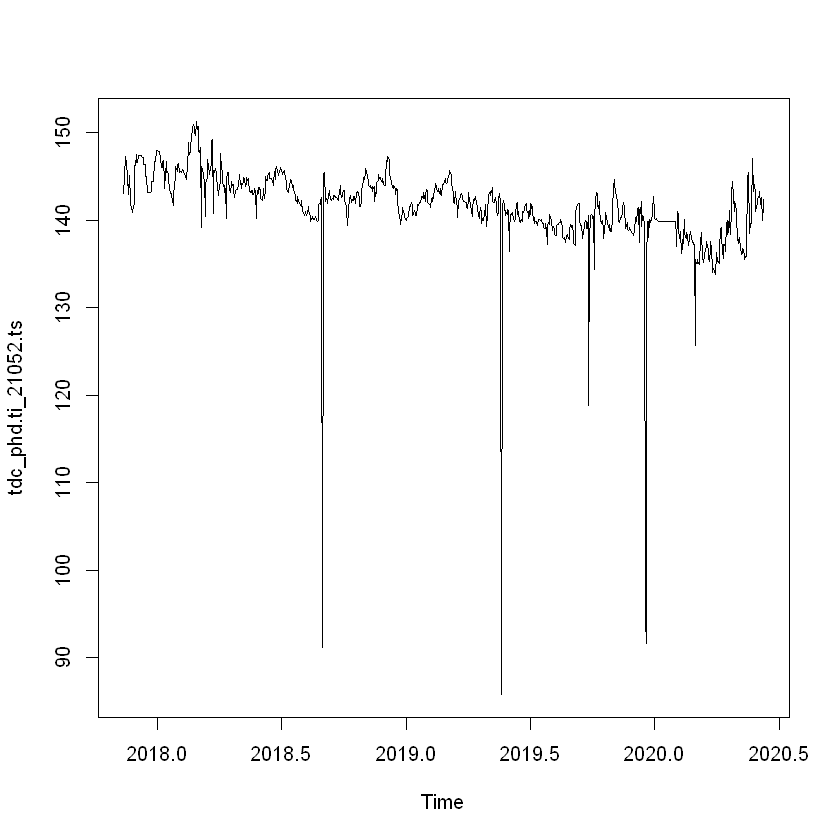

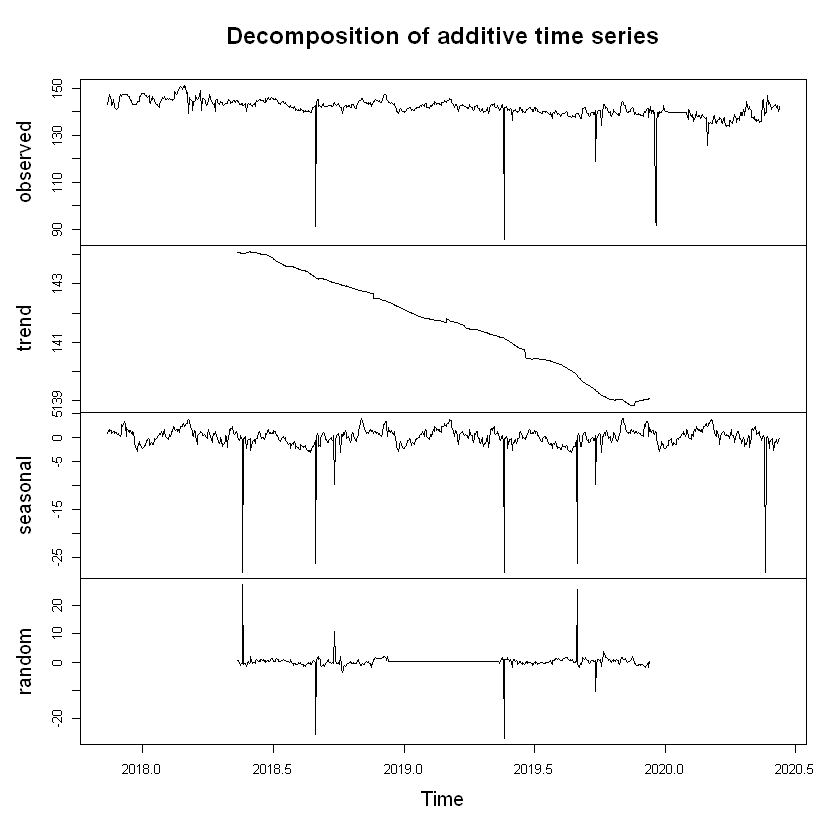

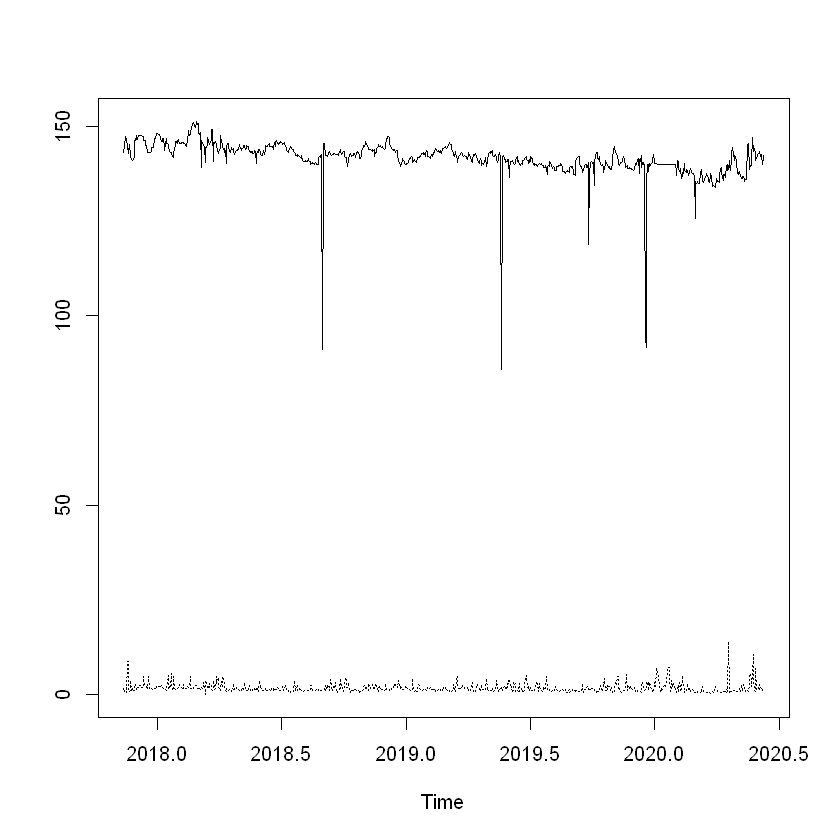

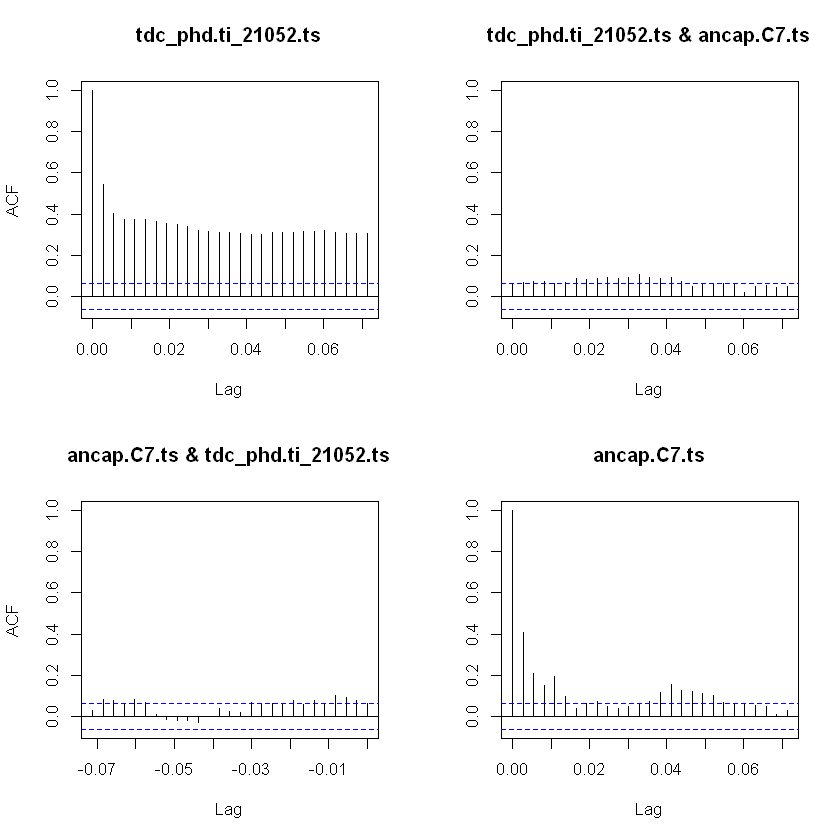

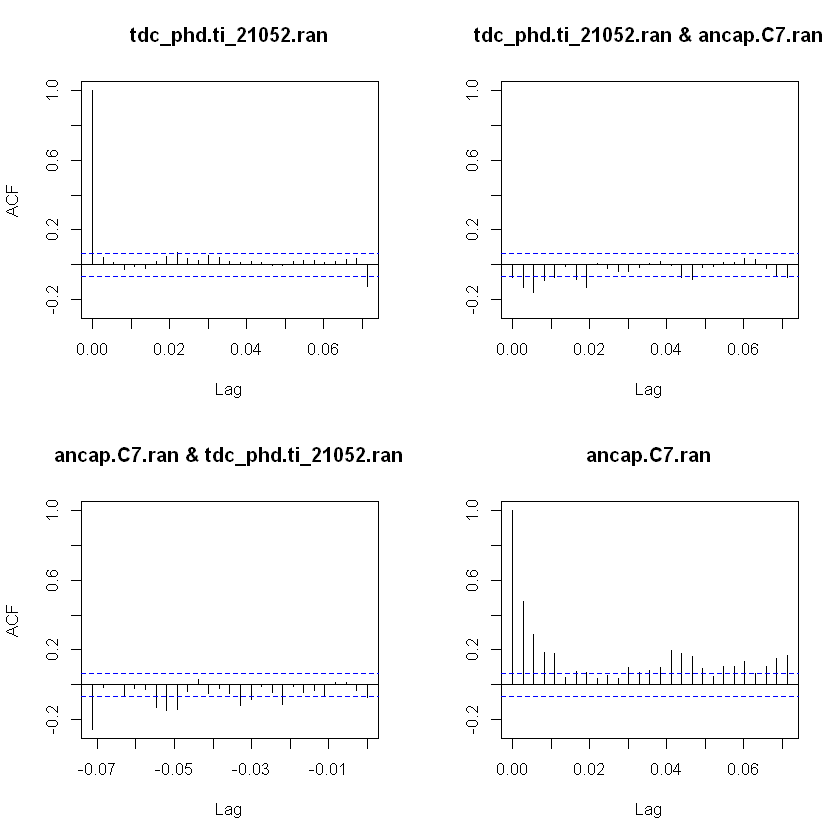

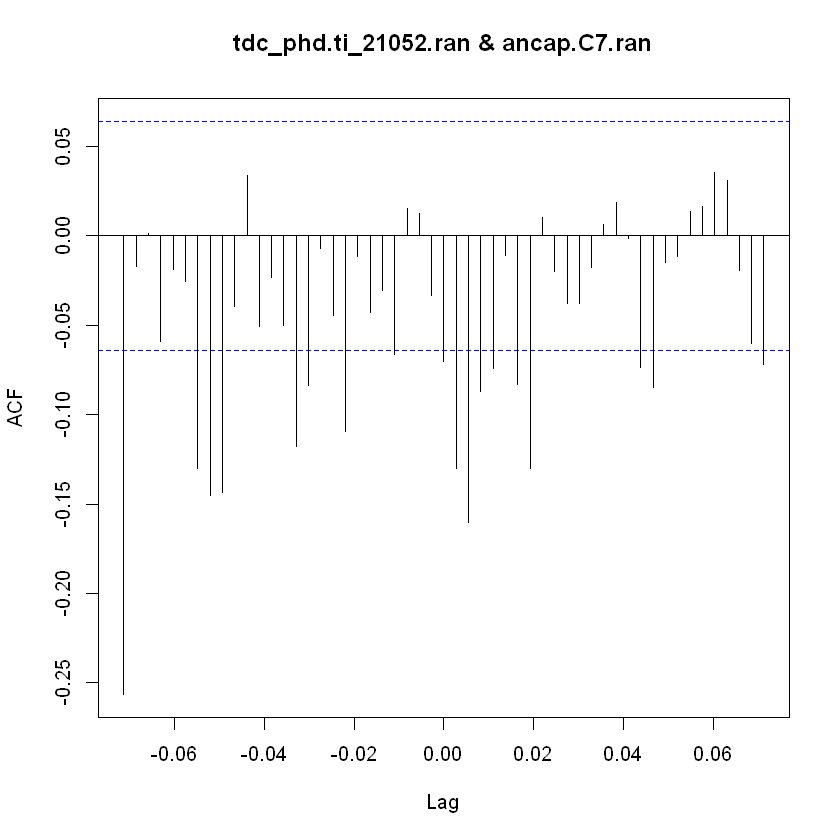

In [23]:
tdc_phd.ti_21052.ts <- ts(tdc_phd.ti_21052, start = c(2017, 317), freq = 365)
plot(tdc_phd.ti_21052.ts)
tdc_phd.ti_21052.decomp <- plot(decompose(tdc_phd.ti_21052.ts))

ts.plot(tdc_phd.ti_21052.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.ti_21052.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.ti_21052.ran <- decompose(tdc_phd.ti_21052.ts)$random

acf(ts.union(tdc_phd.ti_21052.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.ti_21052.ran, ancap.C7.ran, na.action = na.pass)

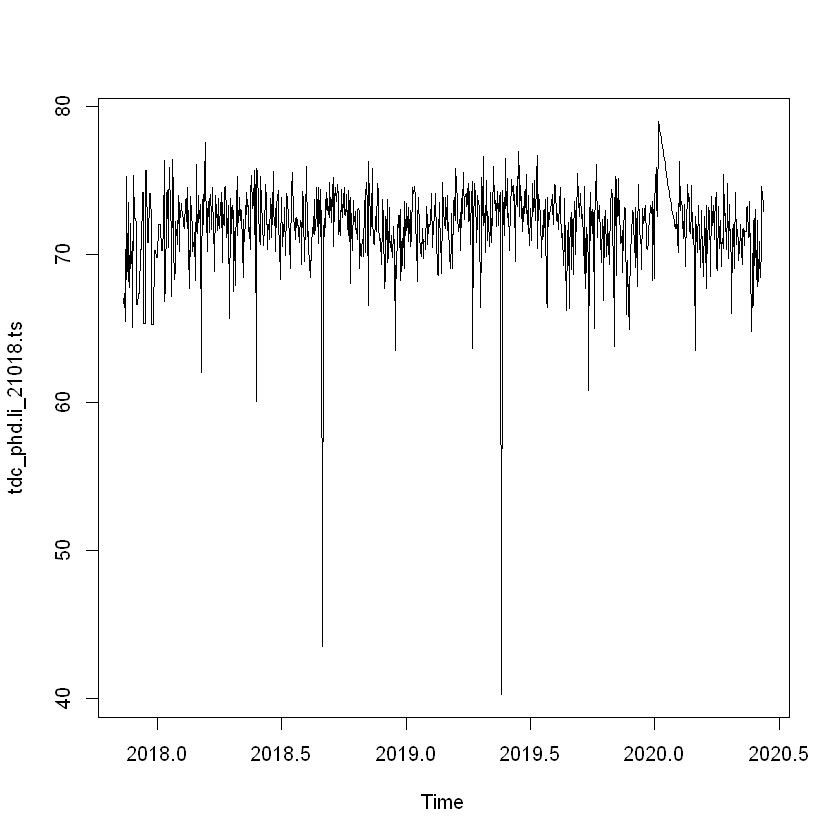

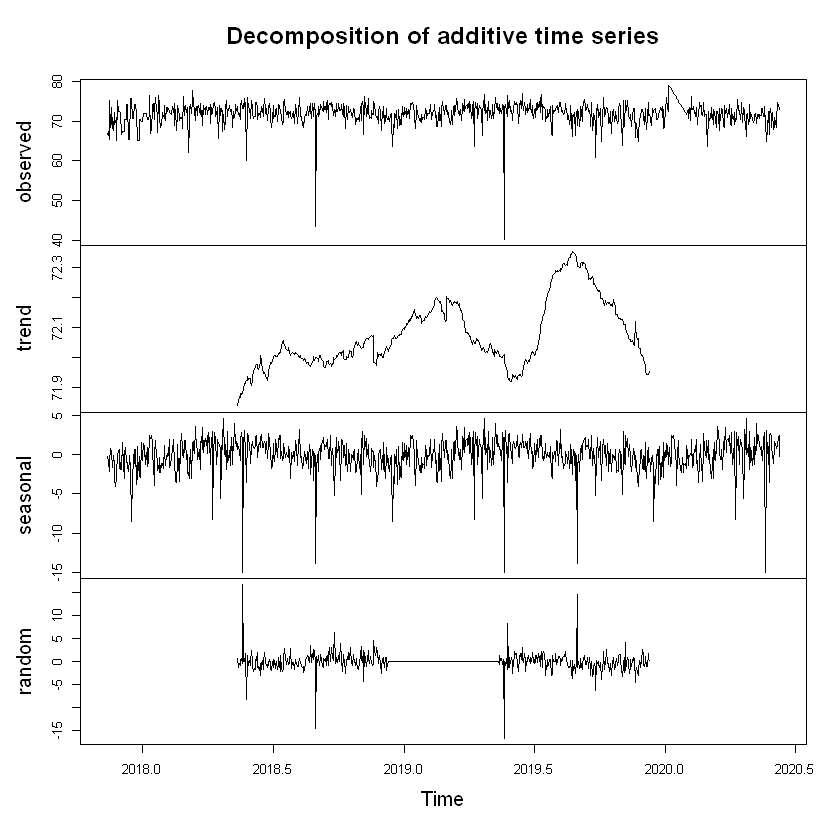

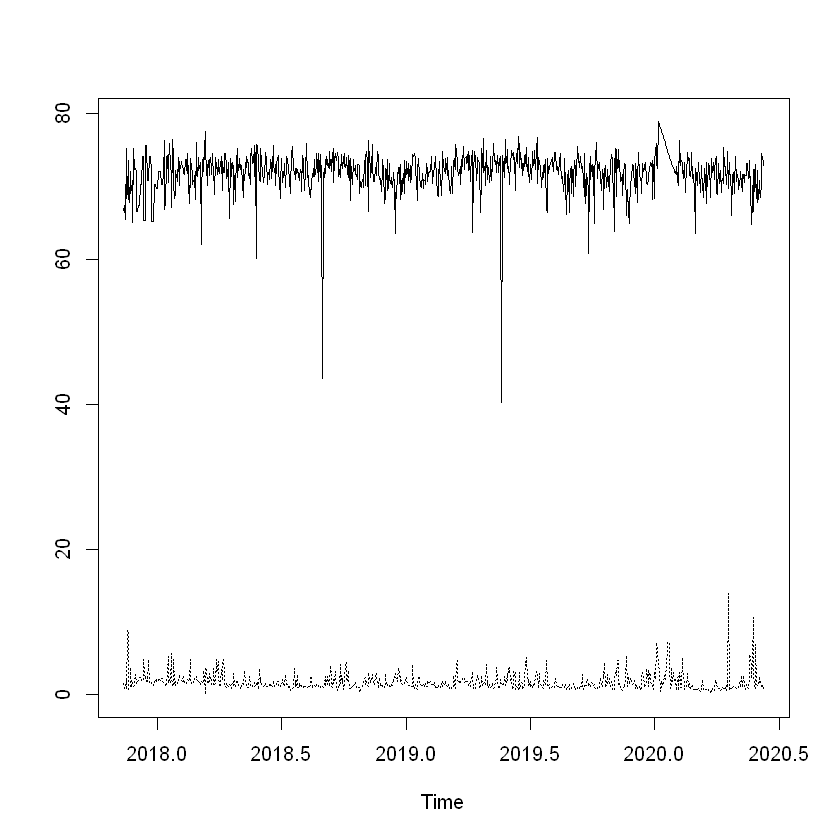

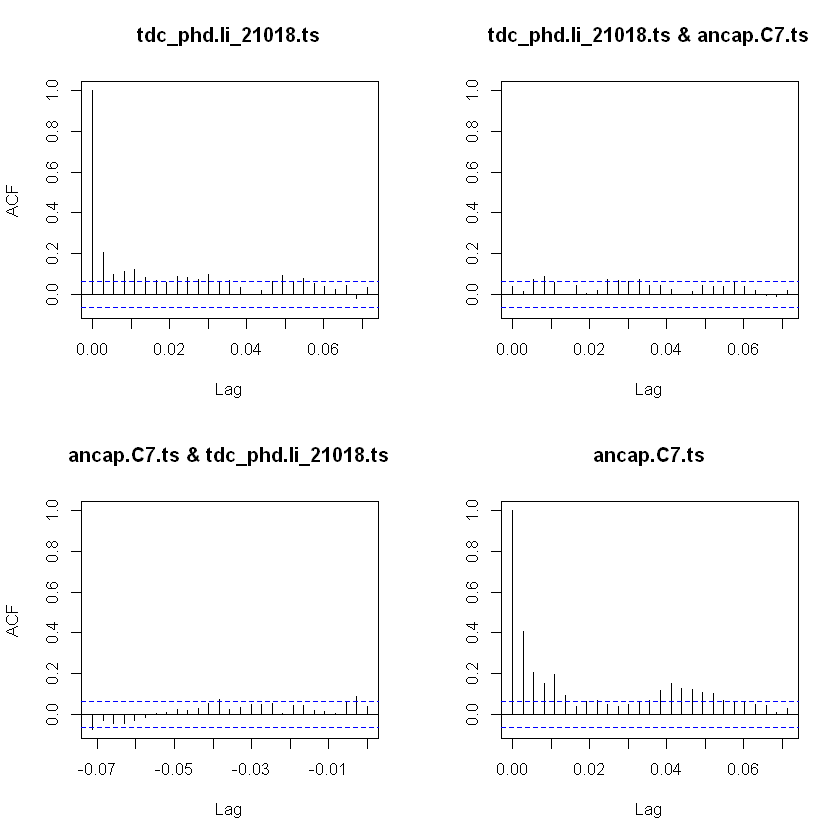

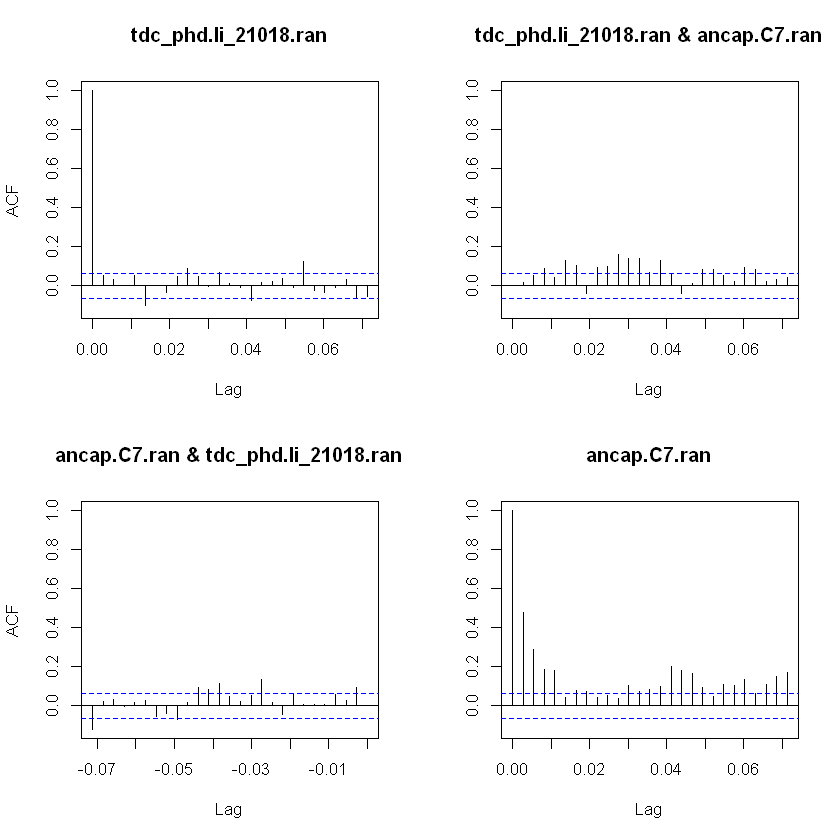

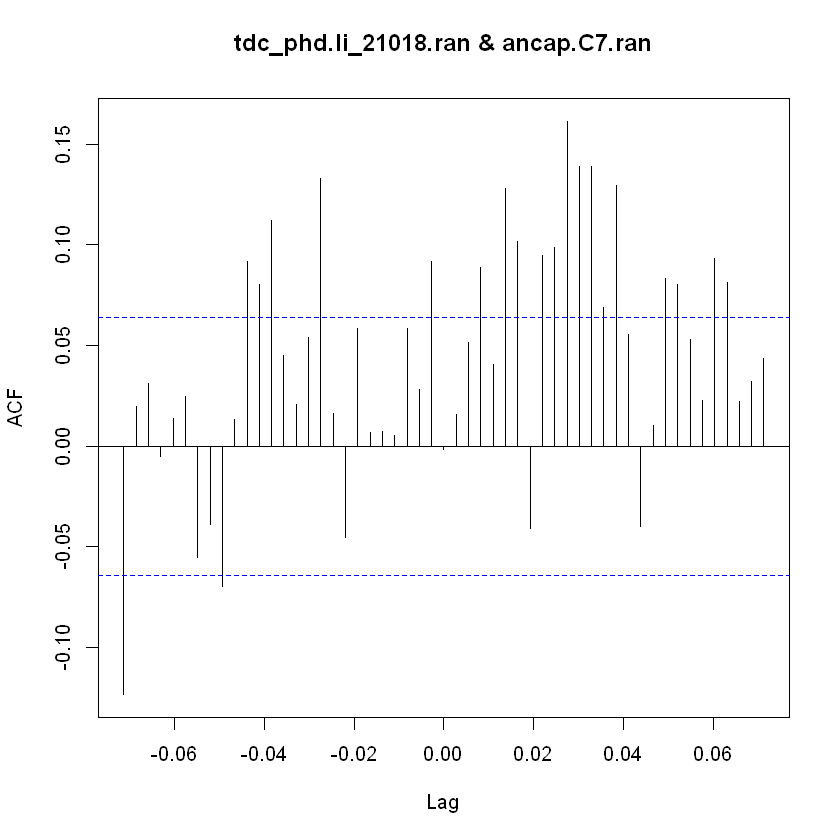

In [24]:
tdc_phd.li_21018.ts <- ts(tdc_phd.li_21018, start = c(2017, 317), freq = 365)
plot(tdc_phd.li_21018.ts)
tdc_phd.li_21018.decomp <- plot(decompose(tdc_phd.li_21018.ts))

ts.plot(tdc_phd.li_21018.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.li_21018.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.li_21018.ran <- decompose(tdc_phd.li_21018.ts)$random

acf(ts.union(tdc_phd.li_21018.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.li_21018.ran, ancap.C7.ran, na.action = na.pass)

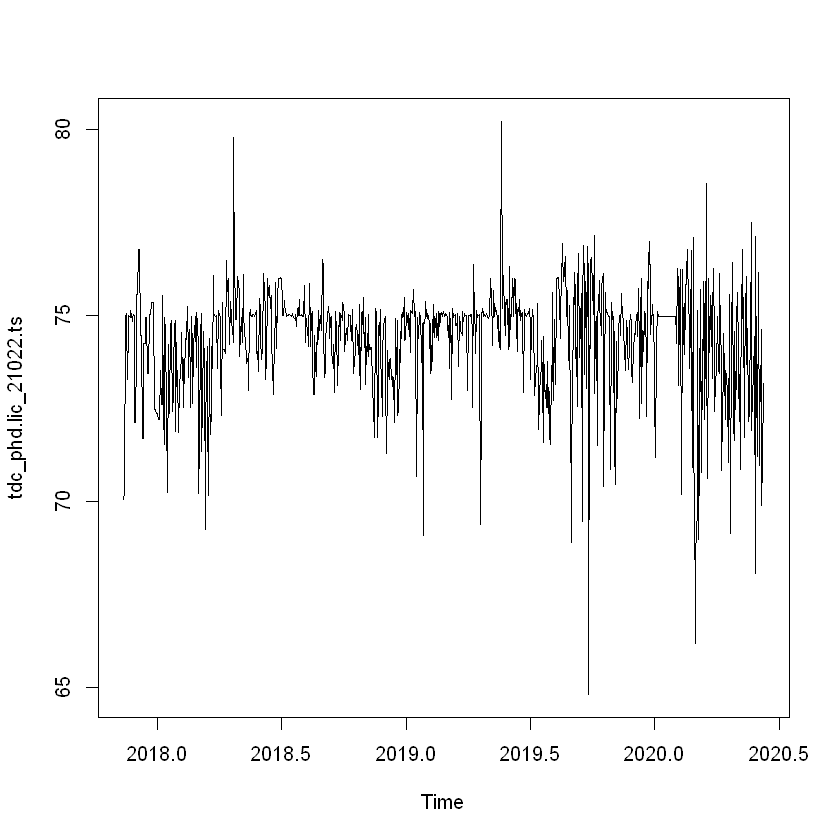

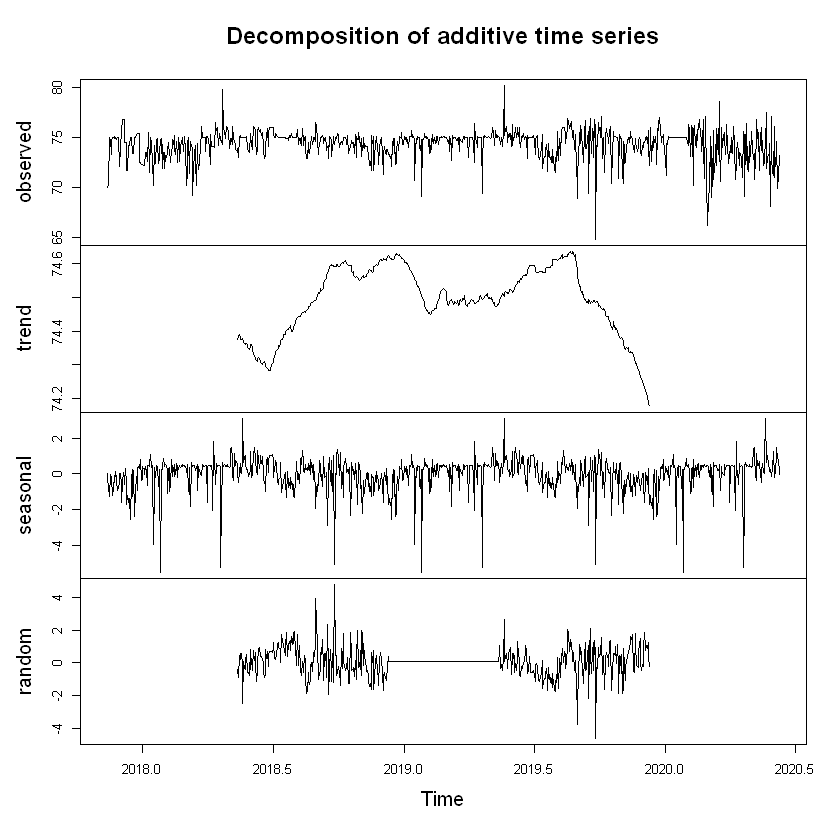

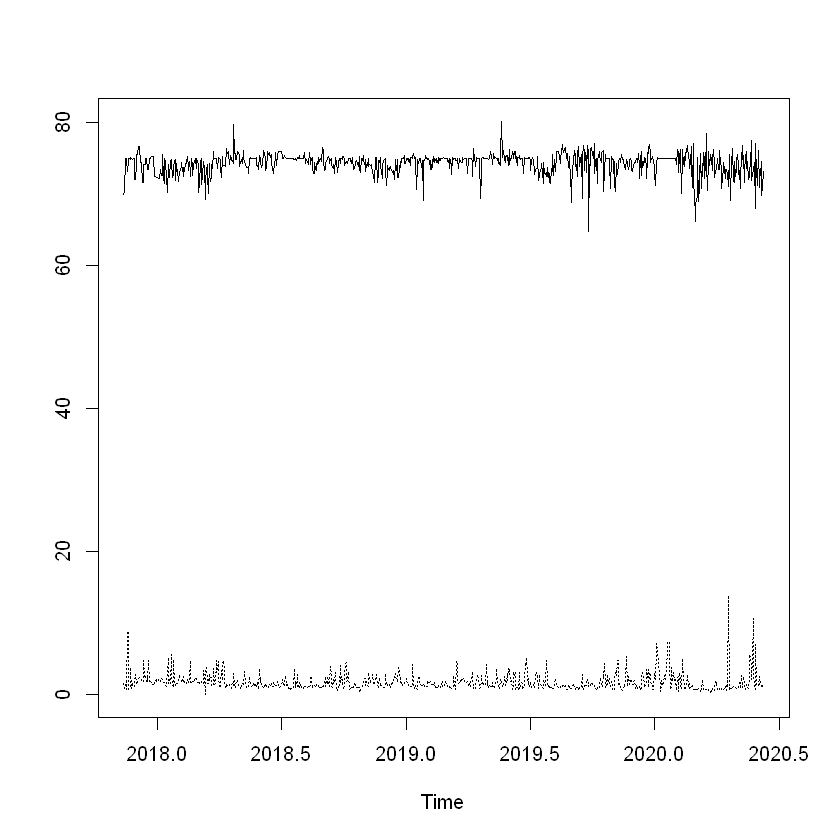

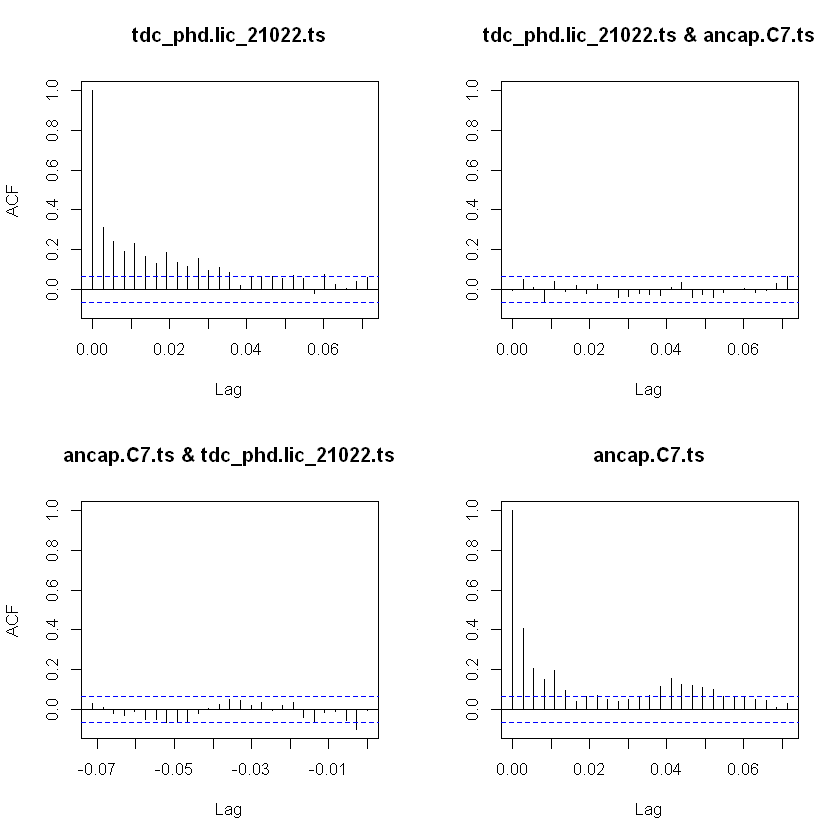

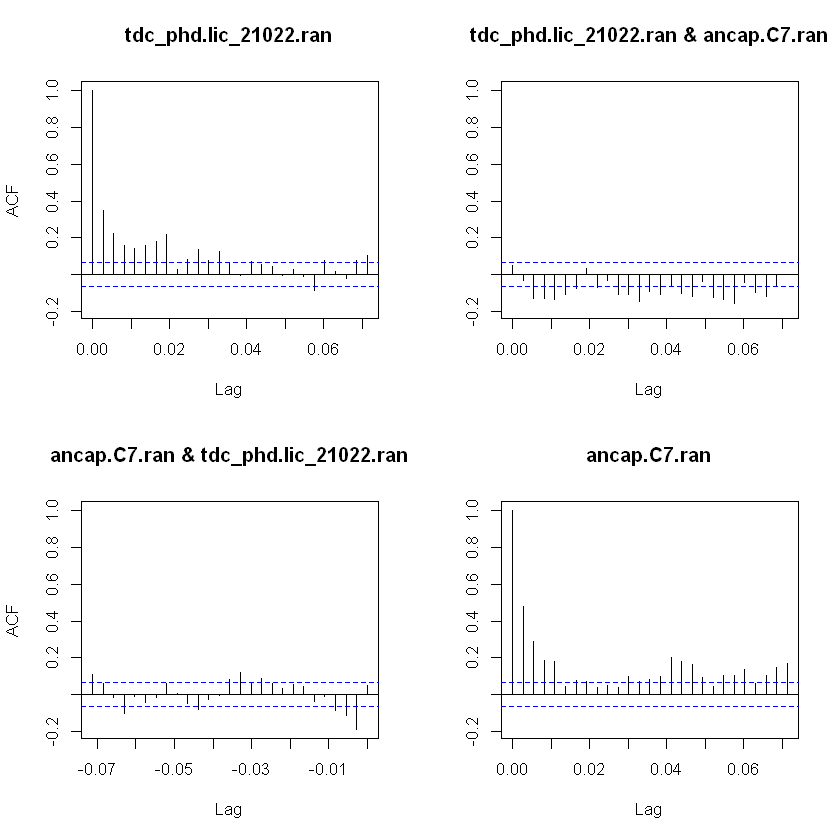

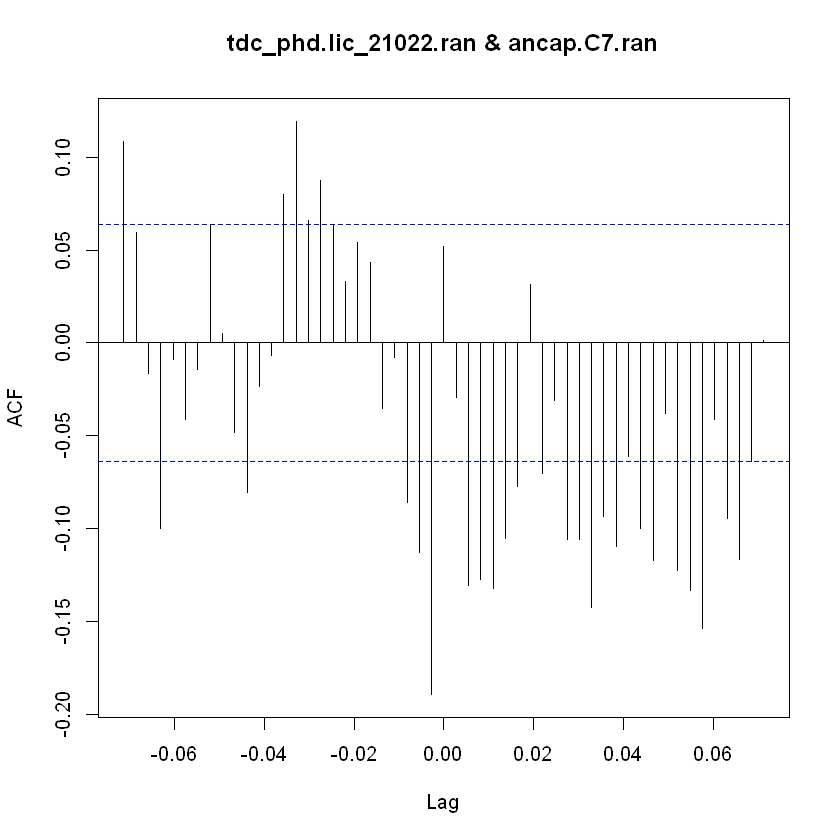

In [25]:
tdc_phd.lic_21022.ts <- ts(tdc_phd.lic_21022, start = c(2017, 317), freq = 365)
plot(tdc_phd.lic_21022.ts)
tdc_phd.lic_21022.decomp <- plot(decompose(tdc_phd.lic_21022.ts))

ts.plot(tdc_phd.lic_21022.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.lic_21022.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.lic_21022.ran <- decompose(tdc_phd.lic_21022.ts)$random

acf(ts.union(tdc_phd.lic_21022.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.lic_21022.ran, ancap.C7.ran, na.action = na.pass)

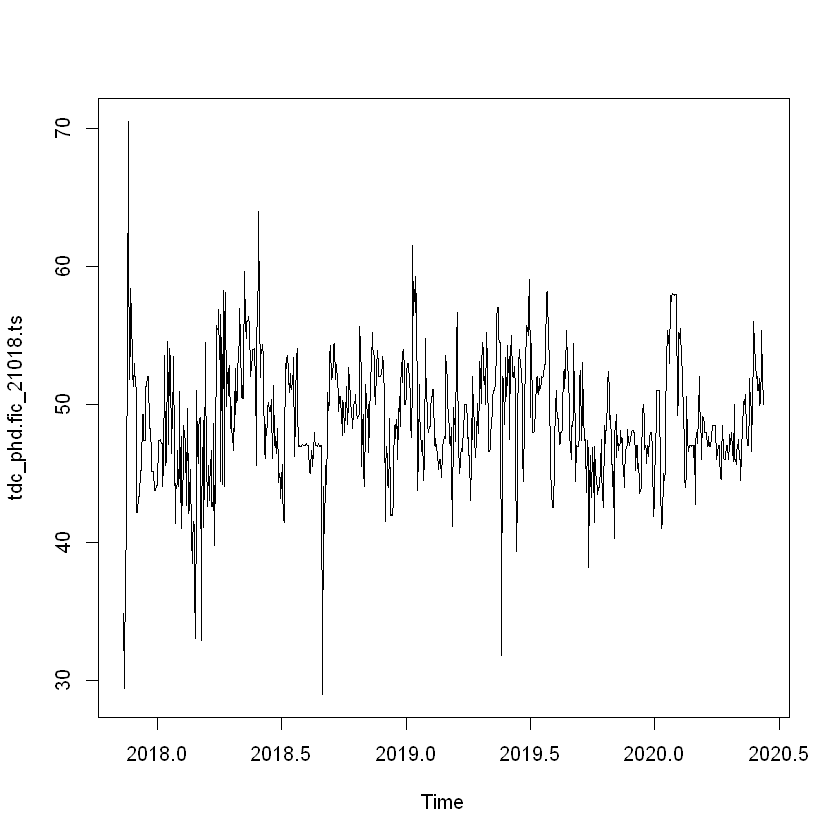

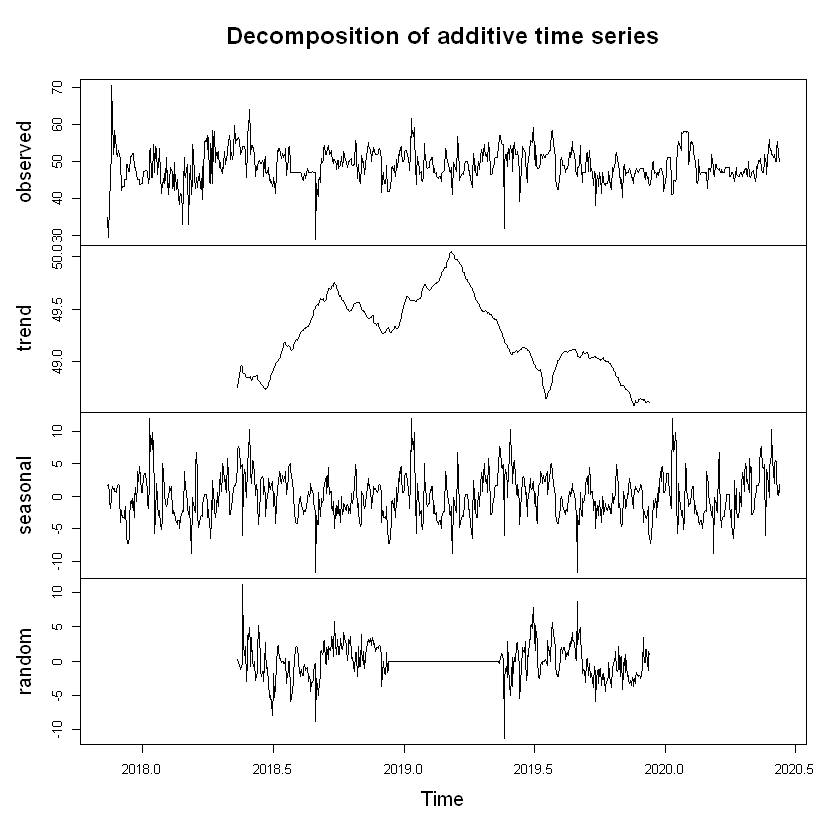

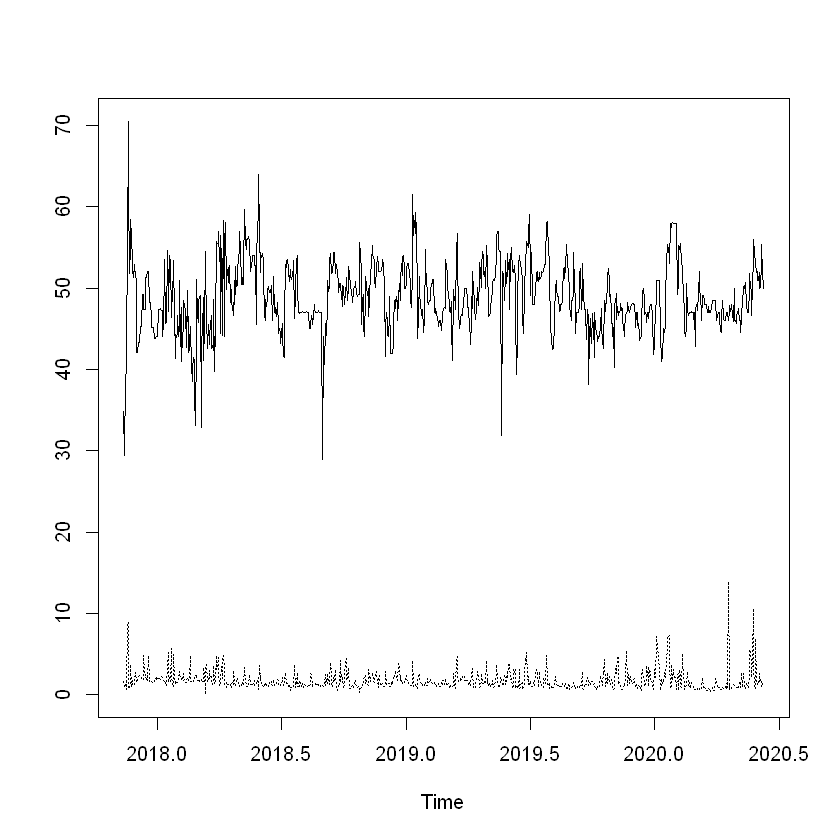

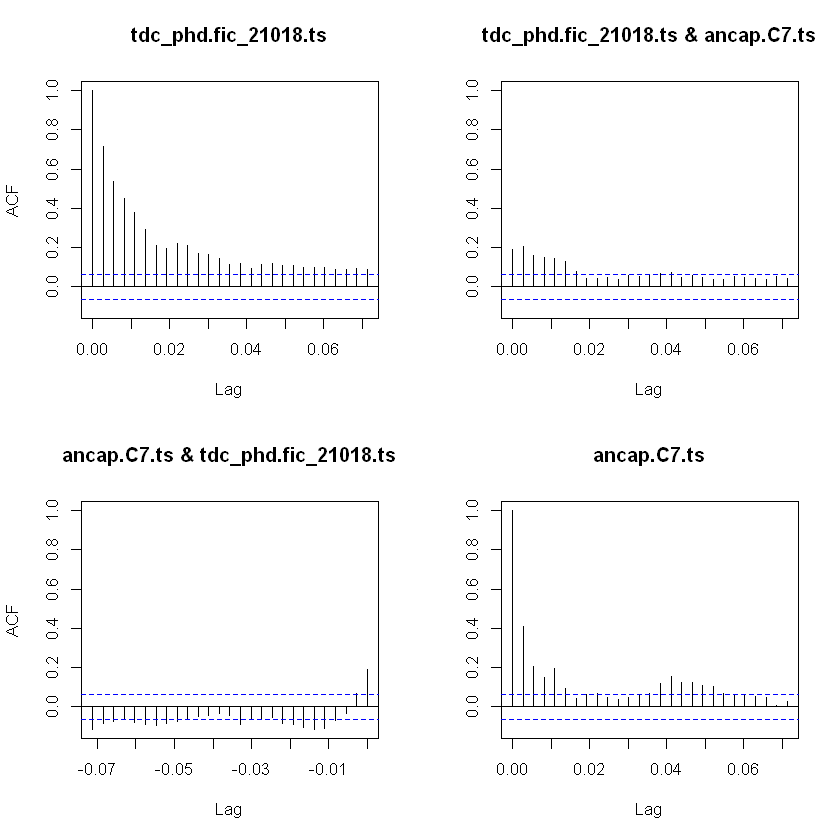

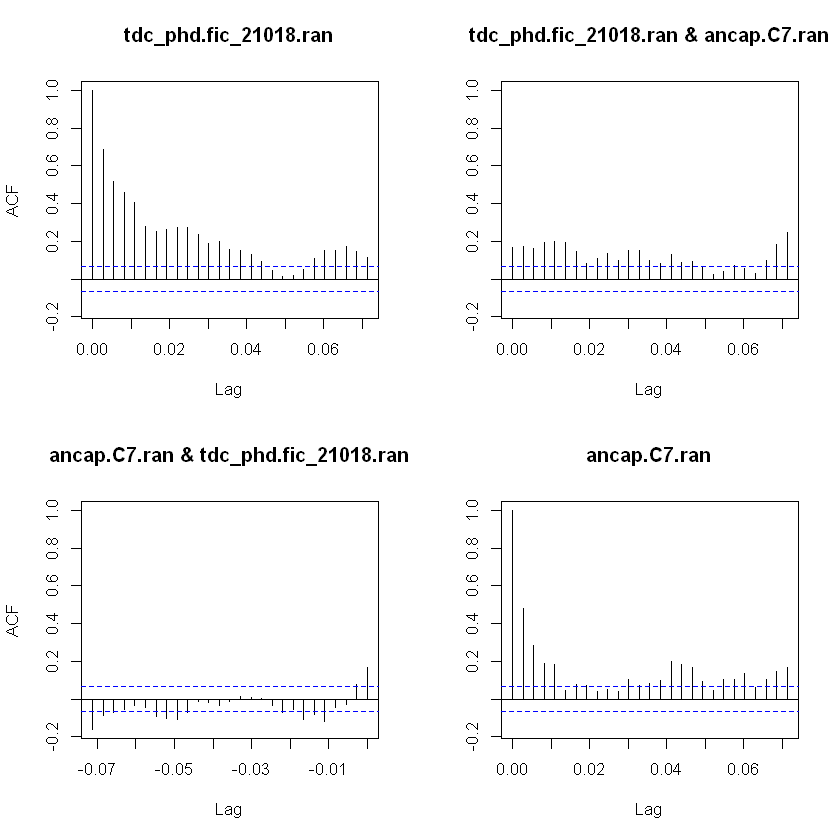

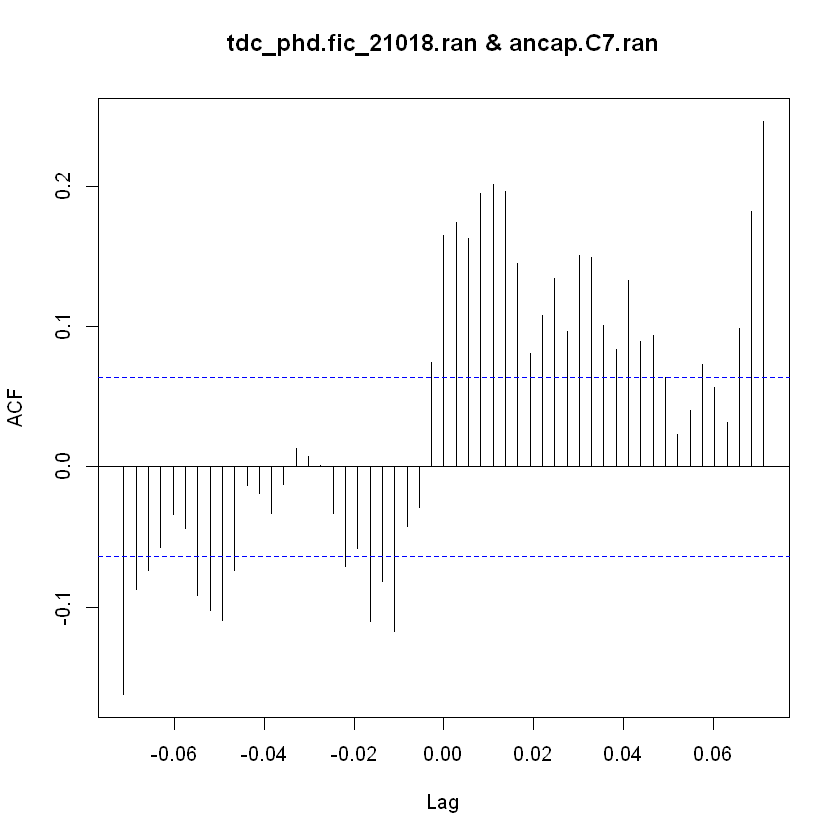

In [26]:
tdc_phd.fic_21018.ts <- ts(tdc_phd.fic_21018, start = c(2017, 317), freq = 365)
plot(tdc_phd.fic_21018.ts)
tdc_phd.fic_21018.decomp <- plot(decompose(tdc_phd.fic_21018.ts))

ts.plot(tdc_phd.fic_21018.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.fic_21018.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior. En este caso parece haber variación de la varianza, disminuyendo con el tiempo.

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.fic_21018.ran <- decompose(tdc_phd.fic_21018.ts)$random

acf(ts.union(tdc_phd.fic_21018.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.fic_21018.ran, ancap.C7.ran, na.action = na.pass)

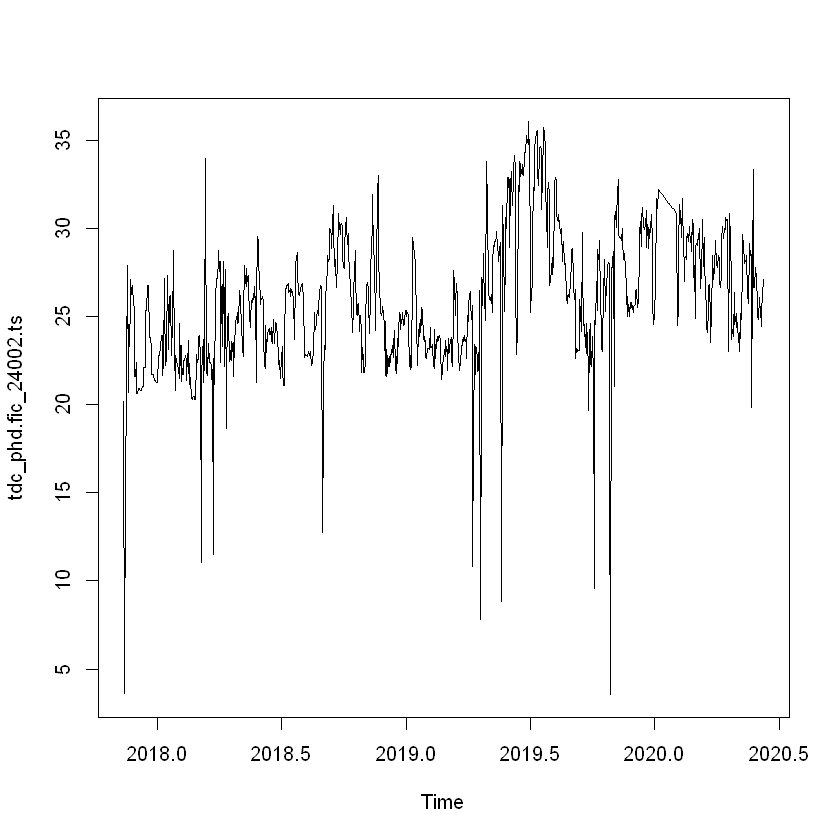

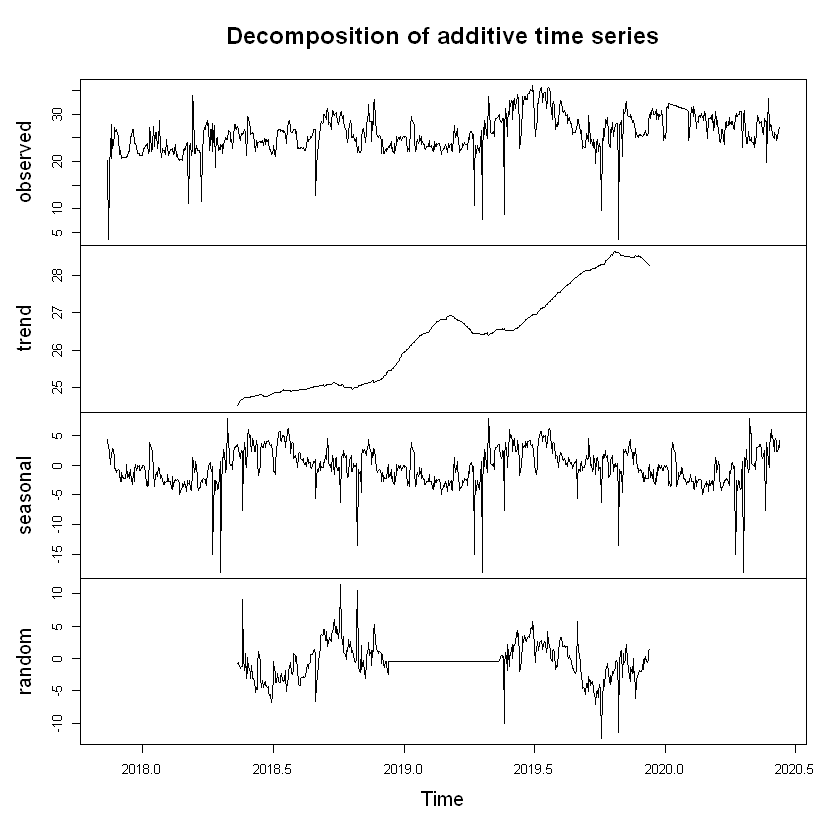

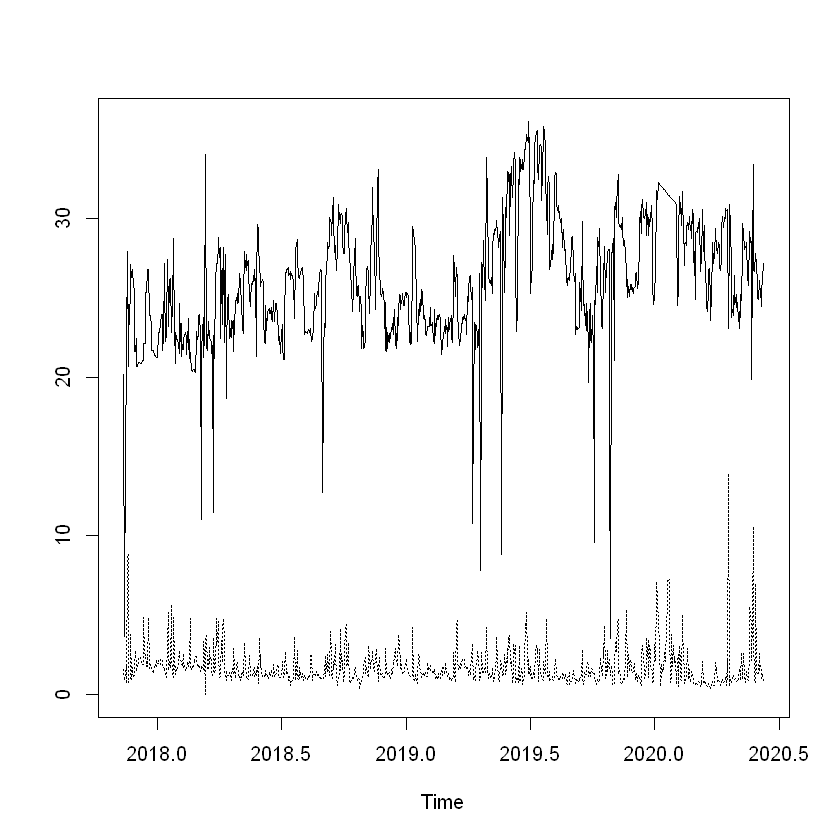

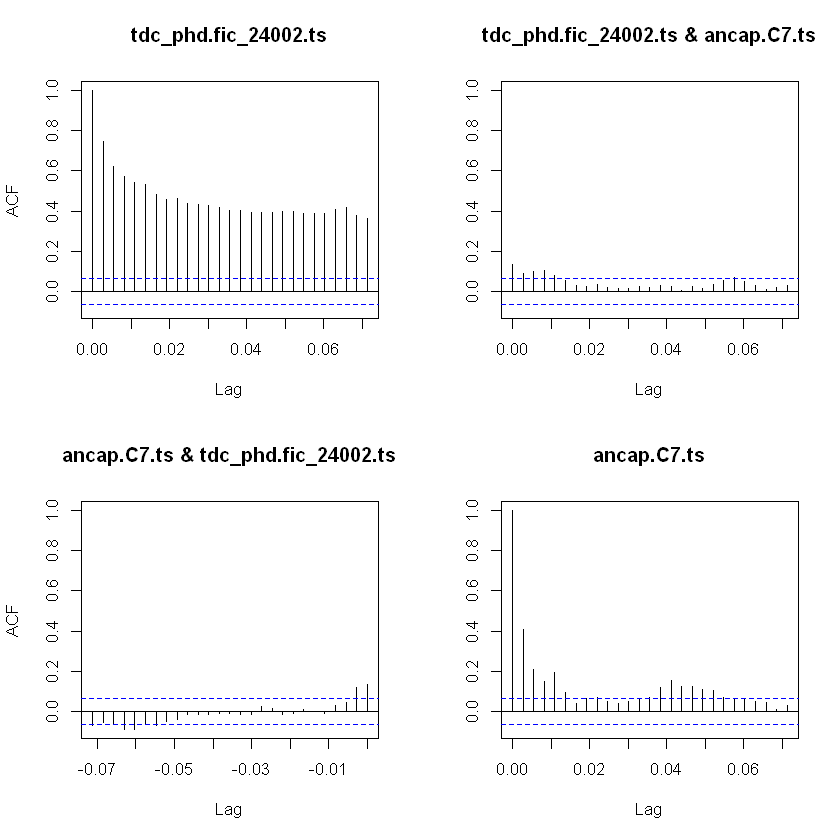

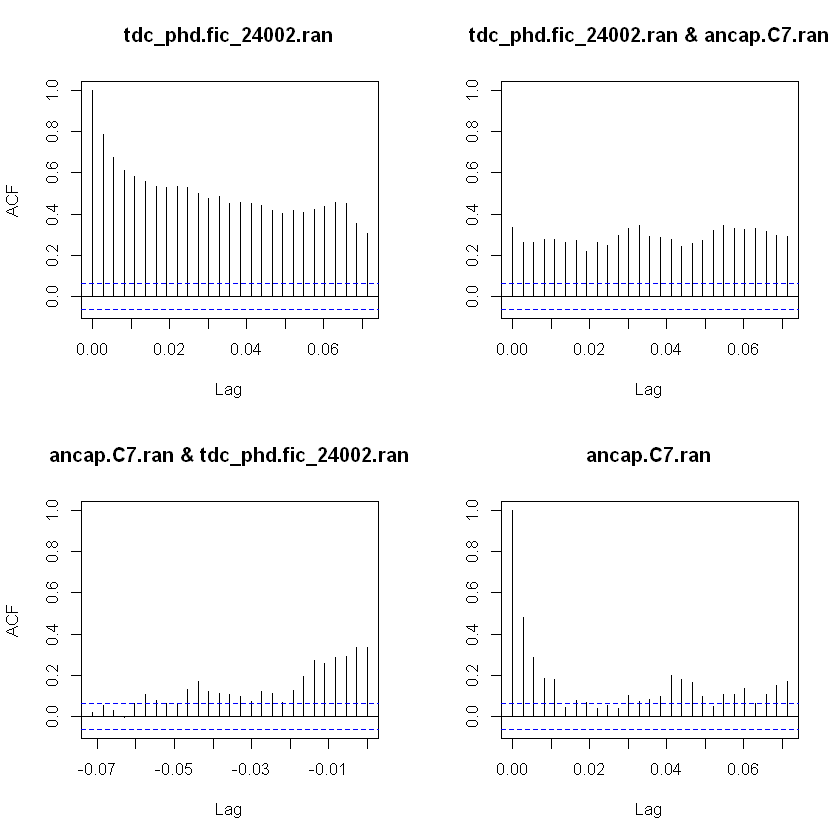

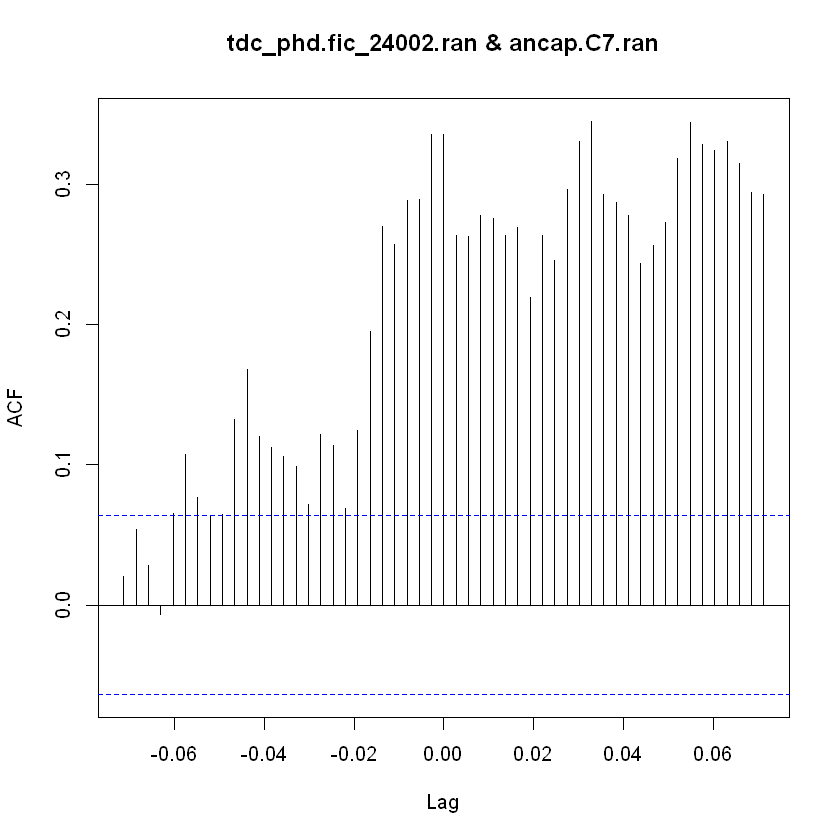

In [27]:
tdc_phd.fic_24002.ts <- ts(tdc_phd.fic_24002, start = c(2017, 317), freq = 365)
plot(tdc_phd.fic_24002.ts)
tdc_phd.fic_24002.decomp <- plot(decompose(tdc_phd.fic_24002.ts))

ts.plot(tdc_phd.fic_24002.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.fic_24002.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.fic_24002.ran <- decompose(tdc_phd.fic_24002.ts)$random

acf(ts.union(tdc_phd.fic_24002.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.fic_24002.ran, ancap.C7.ran, na.action = na.pass)

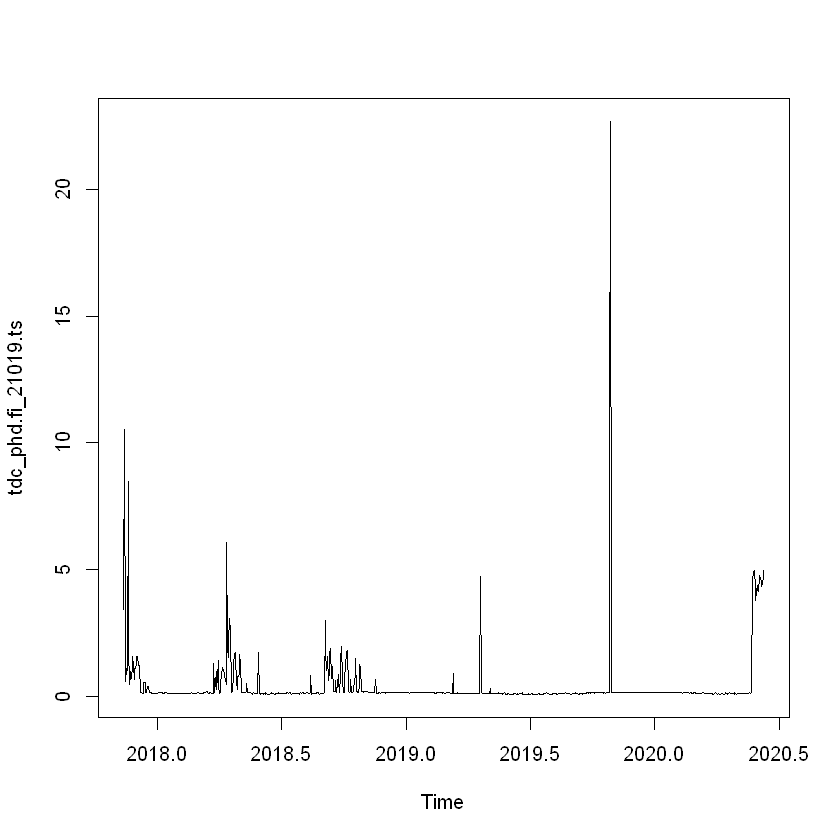

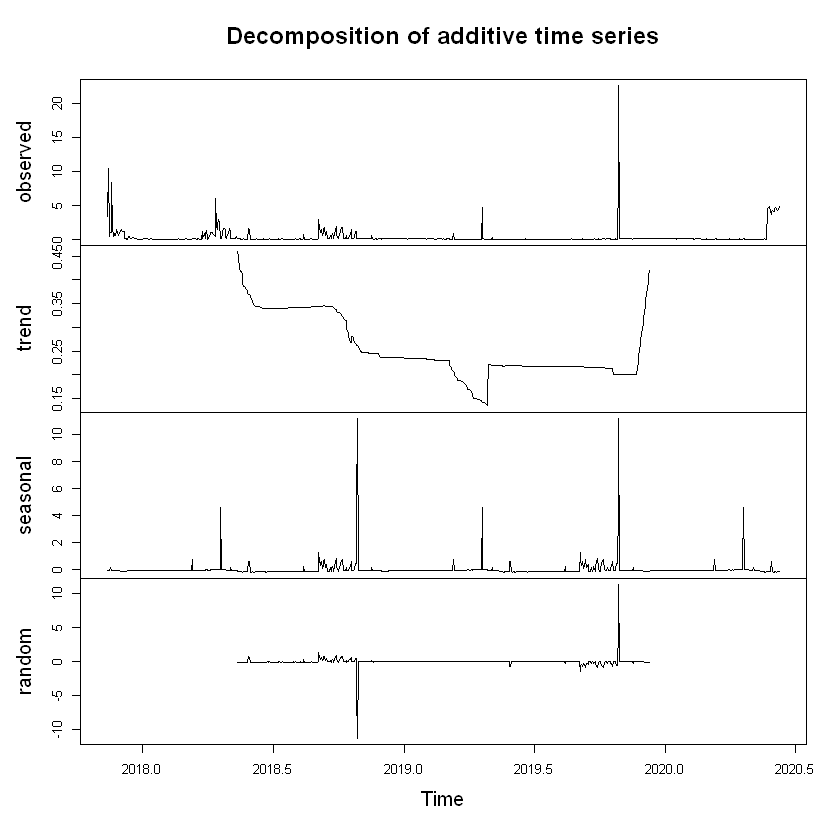

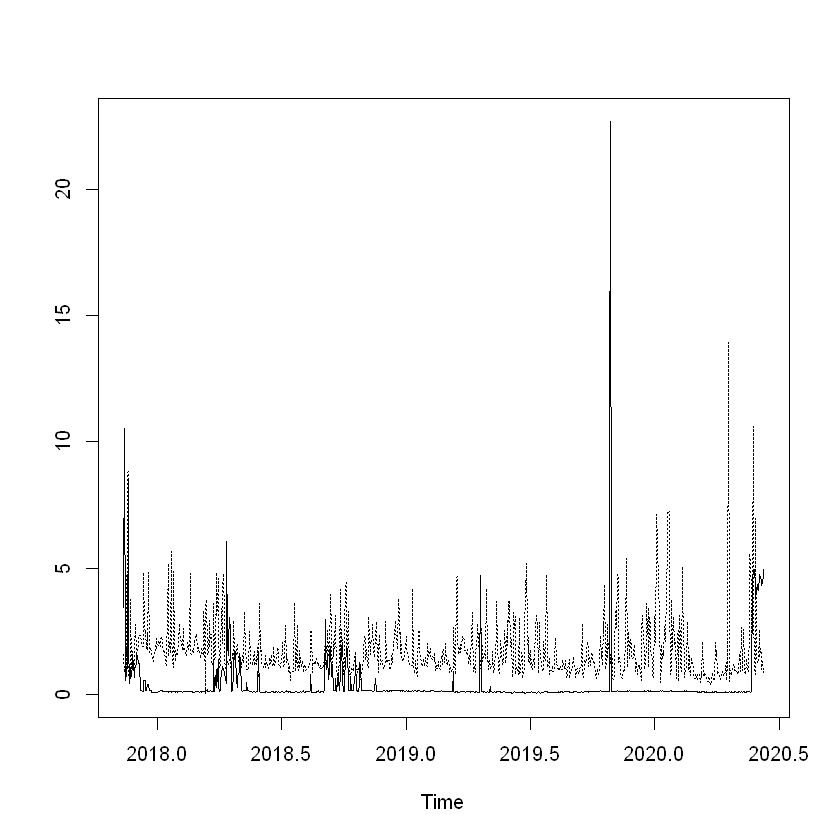

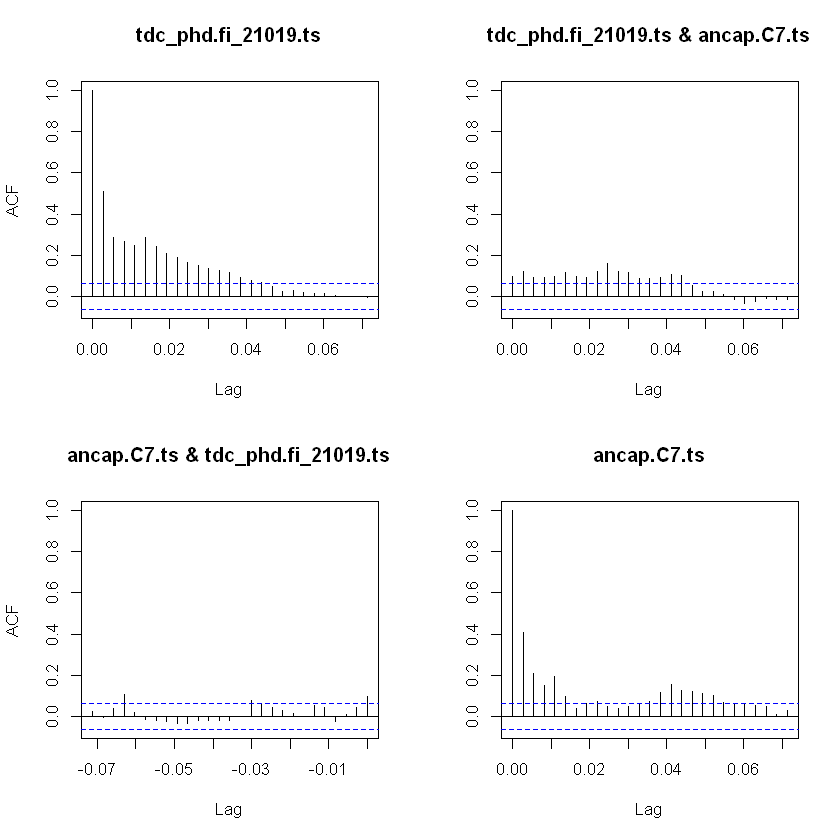

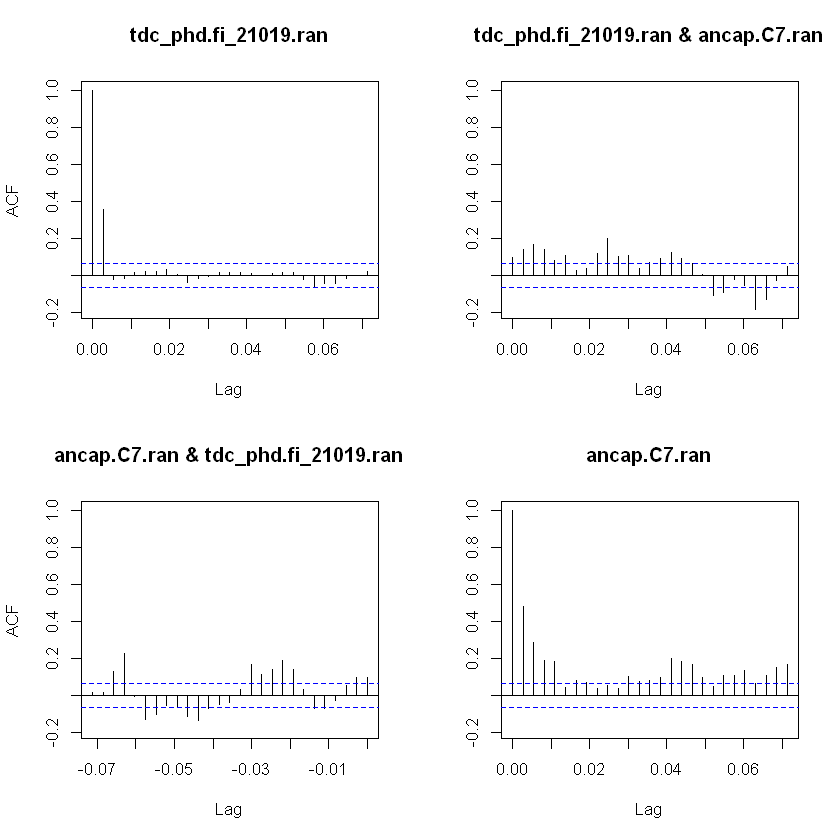

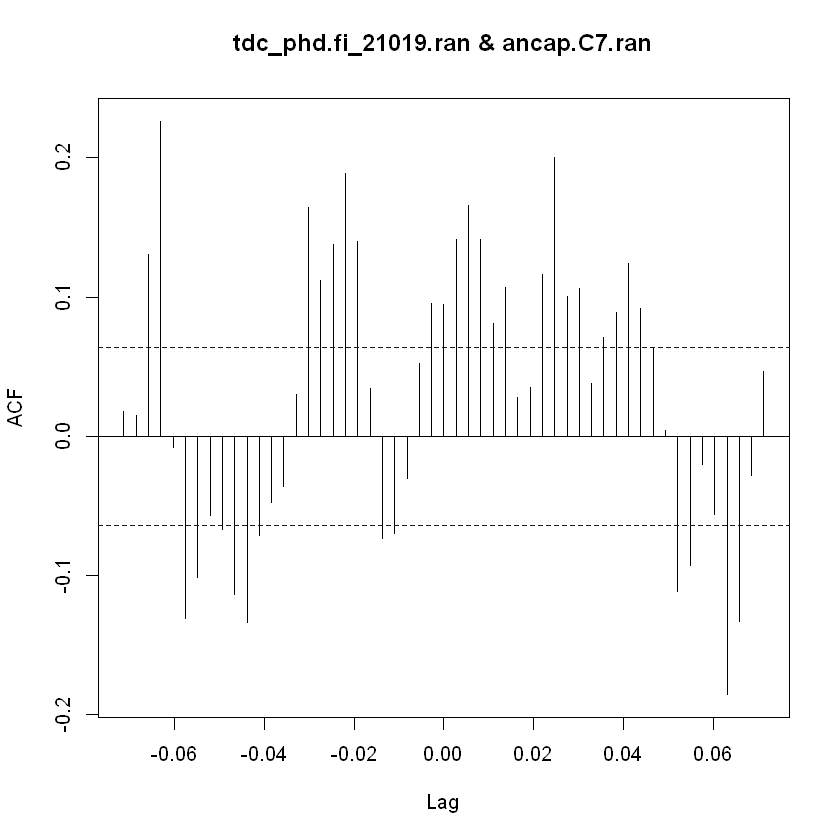

In [28]:
tdc_phd.fi_21019.ts <- ts(tdc_phd.fi_21019, start = c(2017, 317), freq = 365)
plot(tdc_phd.fi_21019.ts)
tdc_phd.fi_21019.decomp <- plot(decompose(tdc_phd.fi_21019.ts))

ts.plot(tdc_phd.fi_21019.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.fi_21019.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.fi_21019.ran <- decompose(tdc_phd.fi_21019.ts)$random

acf(ts.union(tdc_phd.fi_21019.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.fi_21019.ran, ancap.C7.ran, na.action = na.pass)

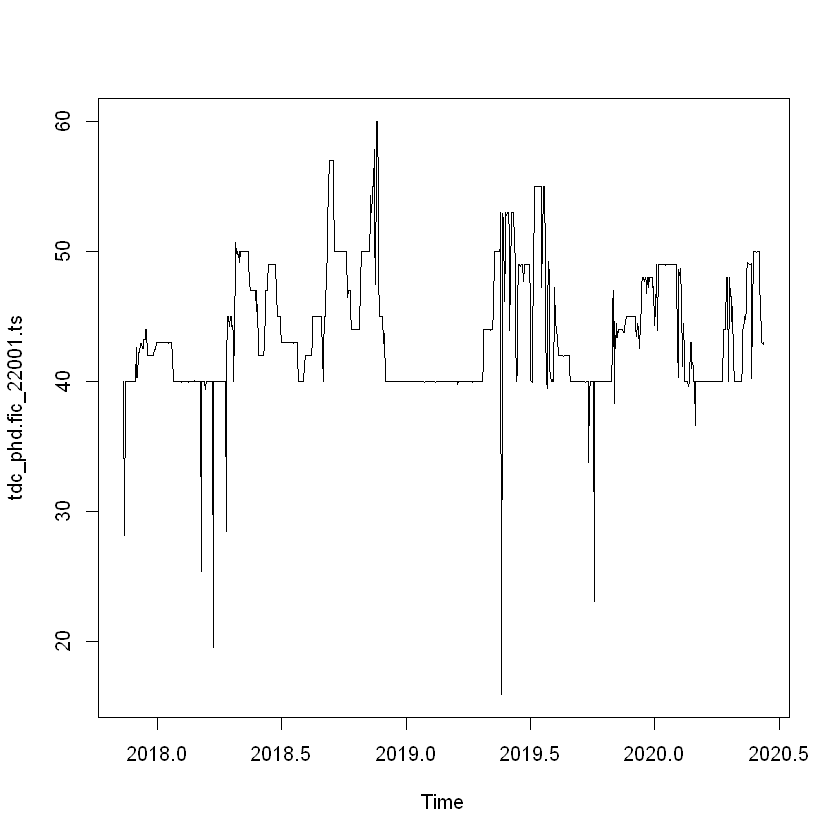

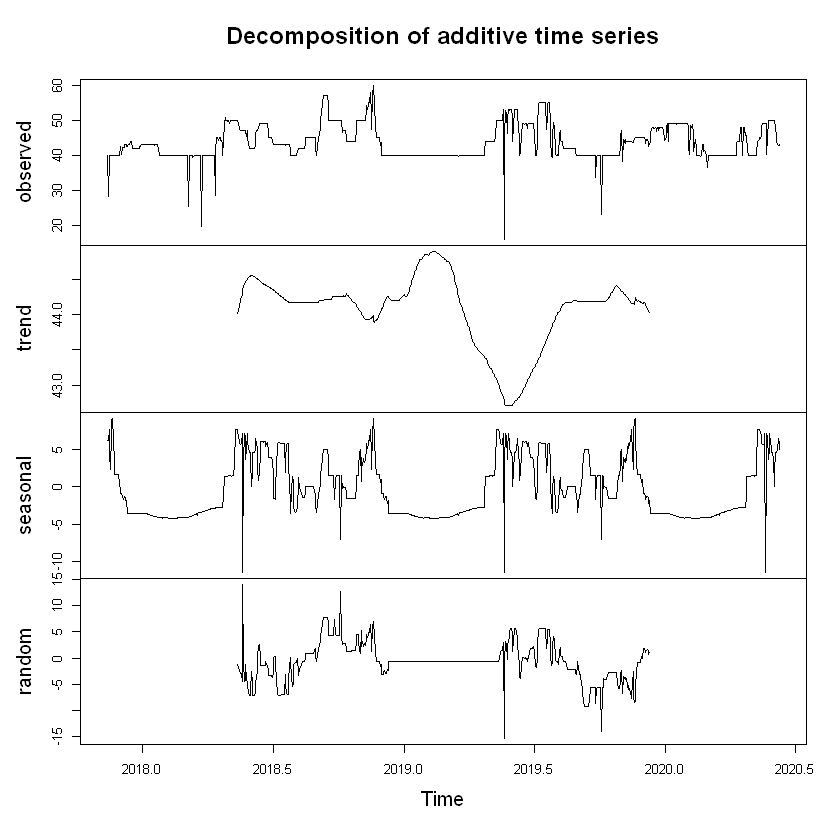

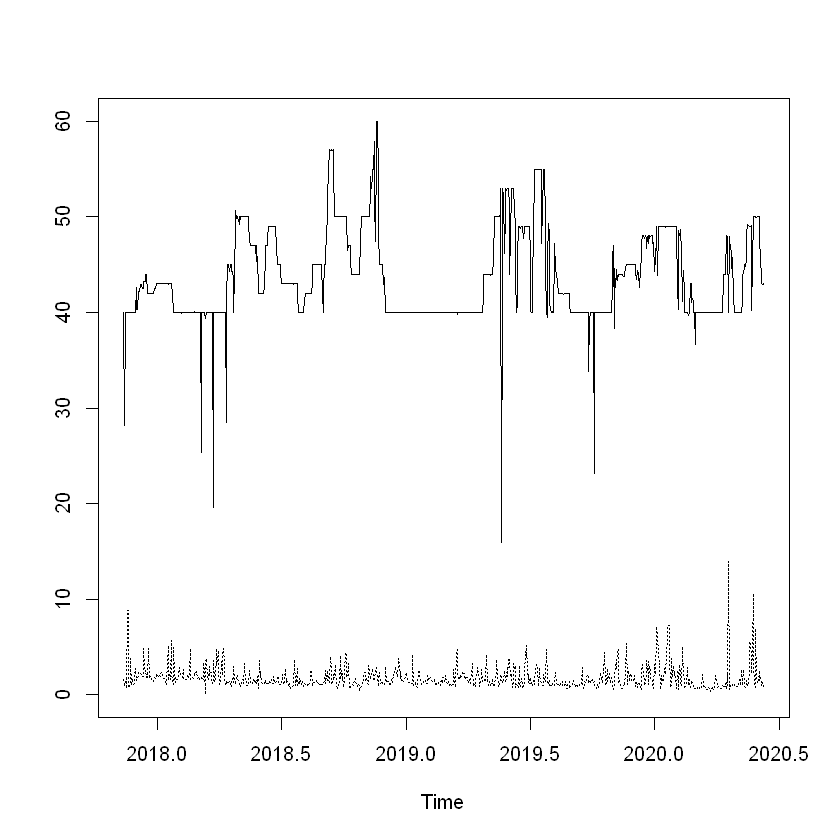

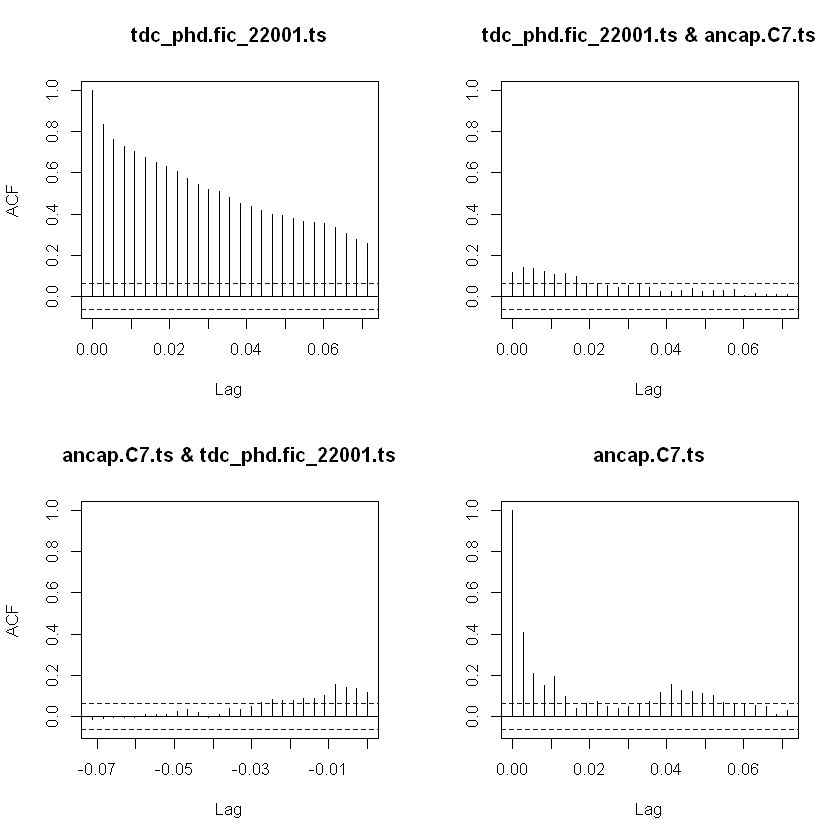

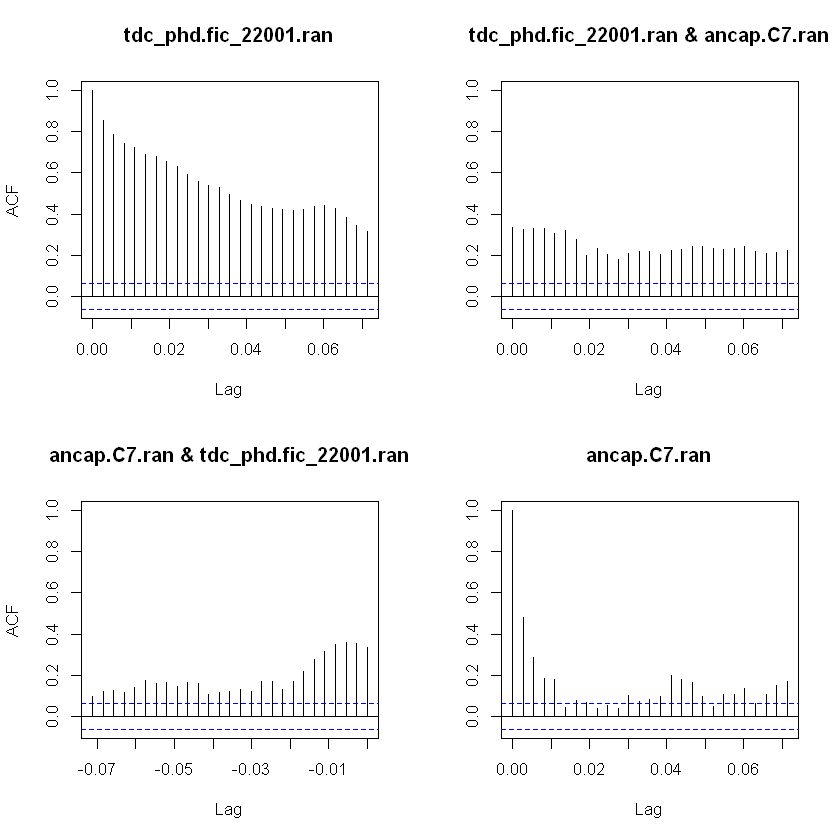

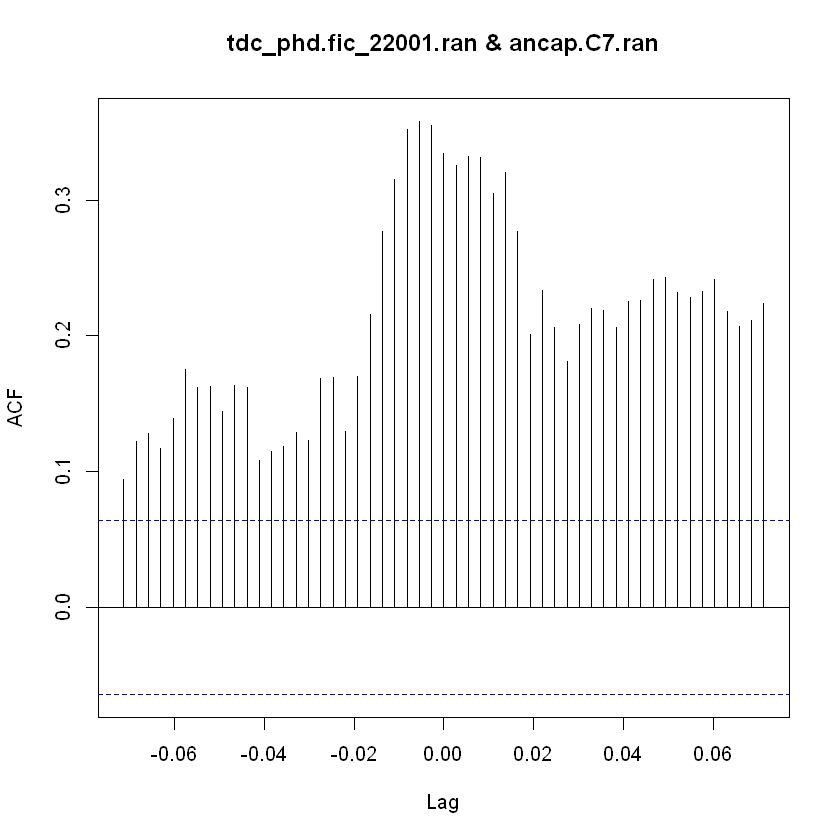

In [29]:
tdc_phd.fic_22001.ts <- ts(tdc_phd.fic_22001, start = c(2017, 317), freq = 365)
plot(tdc_phd.fic_22001.ts)
tdc_phd.fic_22001.decomp <- plot(decompose(tdc_phd.fic_22001.ts))

ts.plot(tdc_phd.fic_22001.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.fic_22001.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.fic_22001.ran <- decompose(tdc_phd.fic_22001.ts)$random

acf(ts.union(tdc_phd.fic_22001.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.fic_22001.ran, ancap.C7.ran, na.action = na.pass)

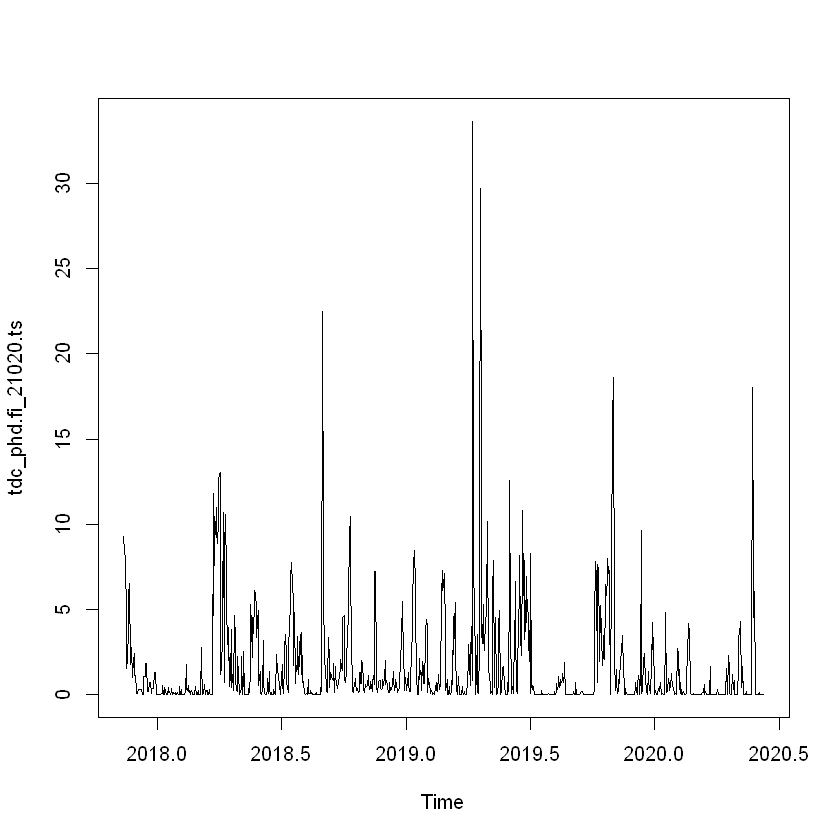

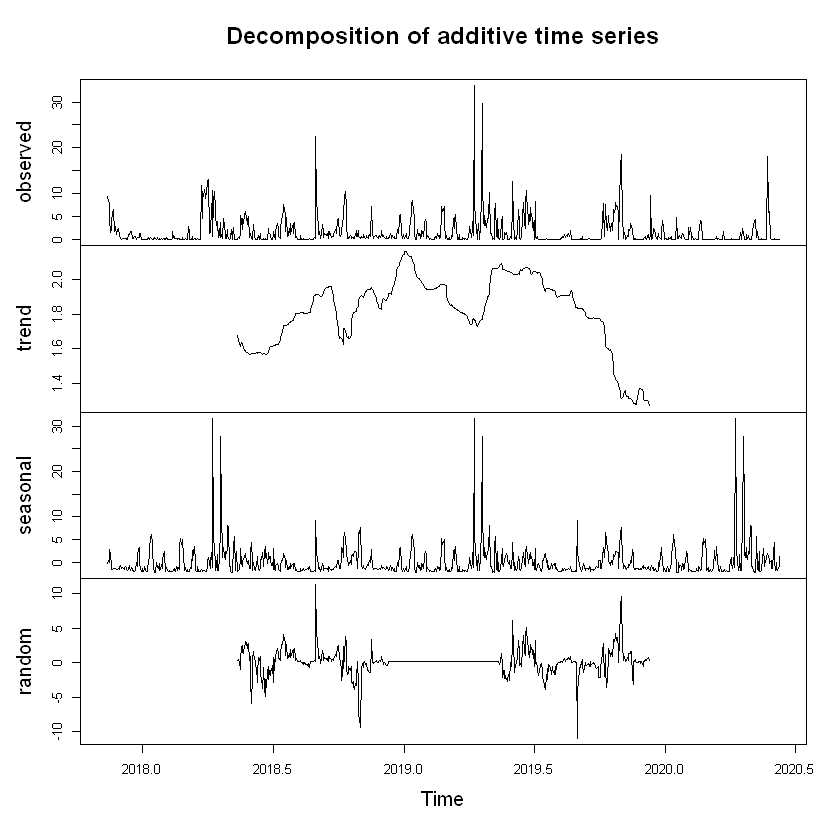

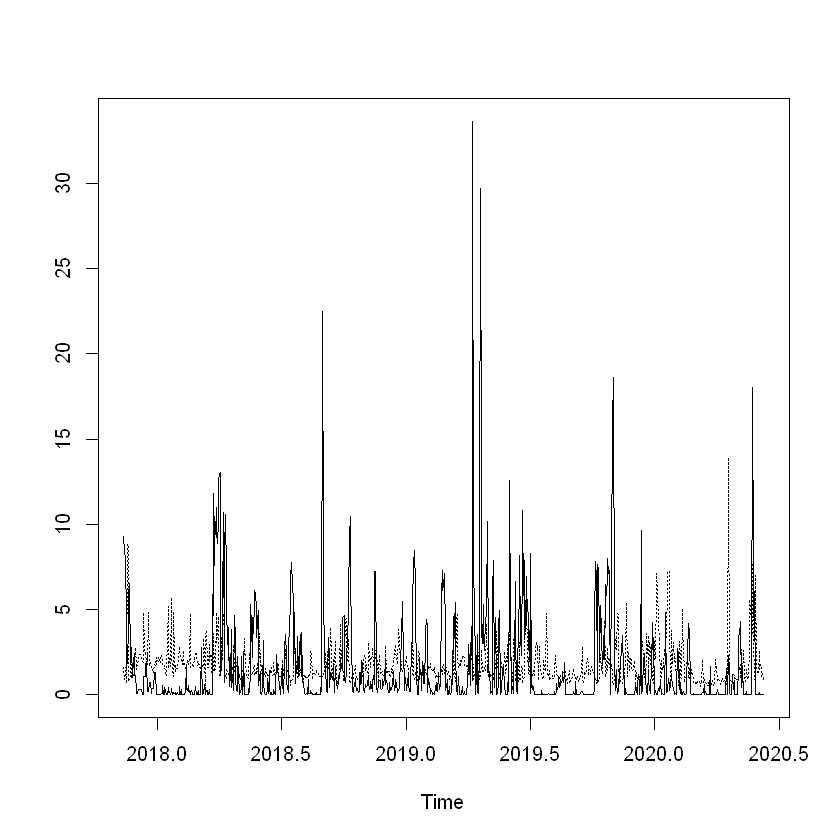

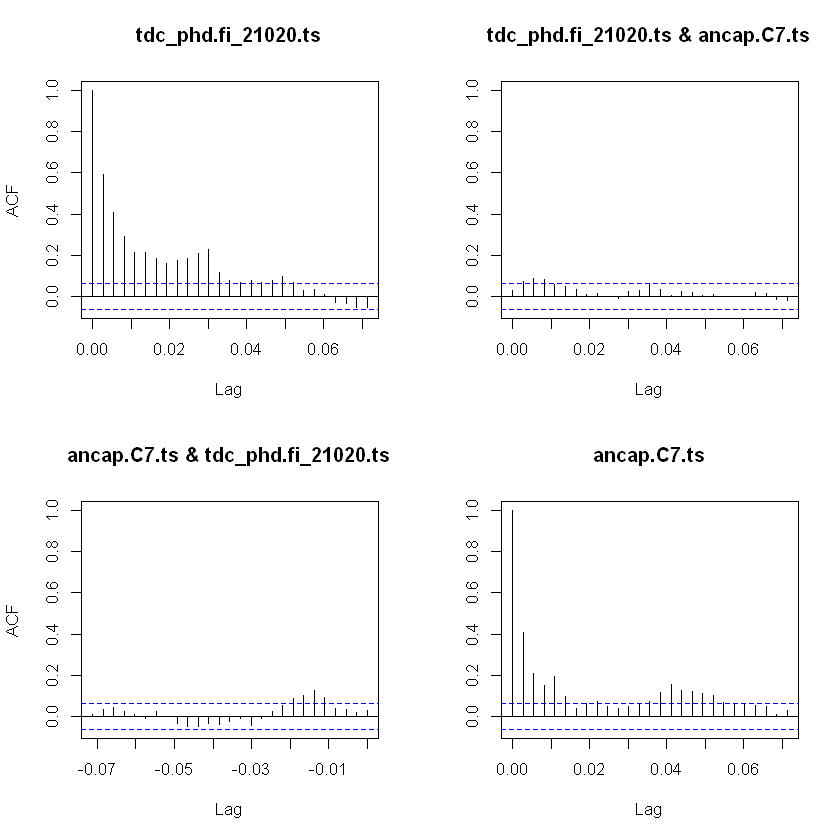

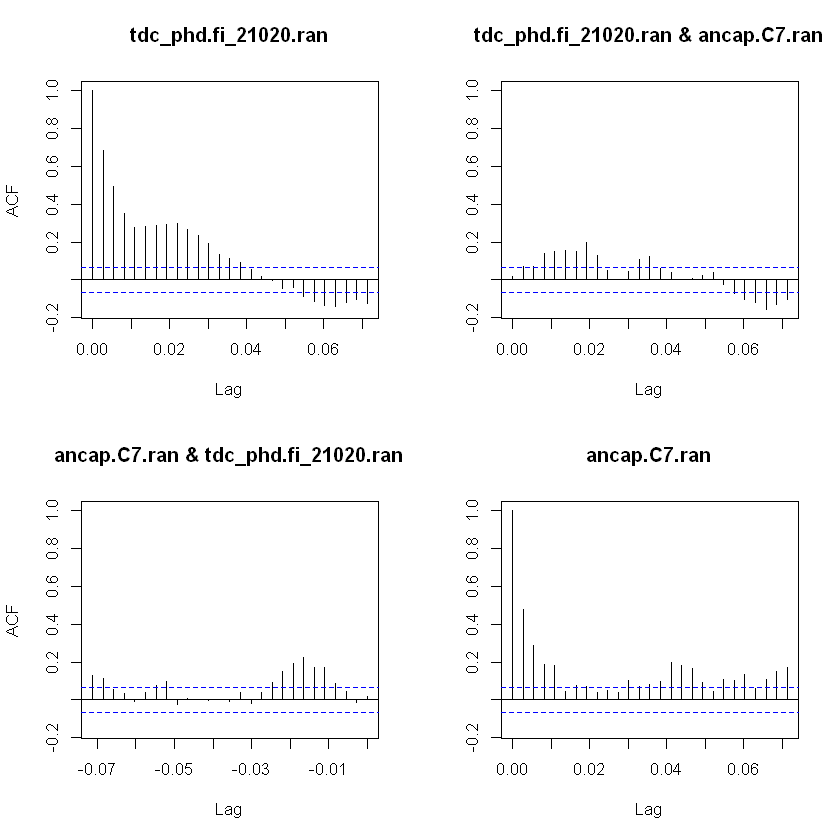

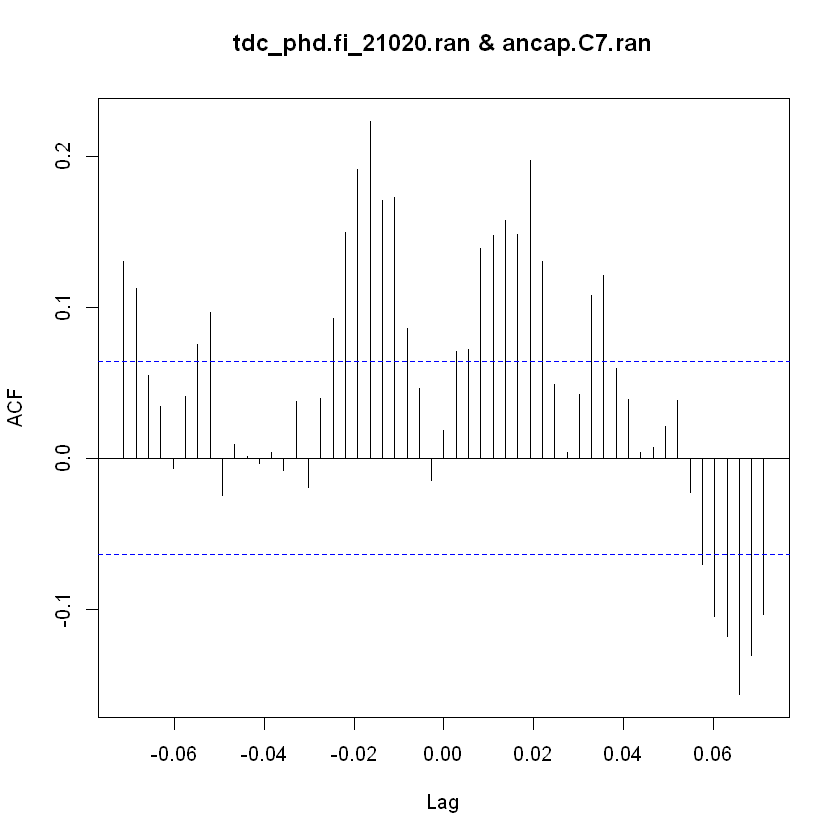

In [30]:
tdc_phd.fi_21020.ts <- ts(tdc_phd.fi_21020, start = c(2017, 317), freq = 365)
plot(tdc_phd.fi_21020.ts)
tdc_phd.fi_21020.decomp <- plot(decompose(tdc_phd.fi_21020.ts))

ts.plot(tdc_phd.fi_21020.ts, ancap.C7.ts, lty = c(1,3))
acf(ts.union(tdc_phd.fi_21020.ts, ancap.C7.ts))

#acá me quedo solo con el random para hacer lo anterior

ancap.C7.ran <- decompose(ancap.C7.ts)$random 
tdc_phd.fi_21020.ran <- decompose(tdc_phd.fi_21020.ts)$random

acf(ts.union(tdc_phd.fi_21020.ran, ancap.C7.ran), na.action = na.pass)
ccf (tdc_phd.fi_21020.ran, ancap.C7.ran, na.action = na.pass)